In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
! pip install seaborn-qqplot

In [2]:
df_FE= pd.read_csv('Loan_Data.csv')

C:\Users\patry\AppData\Local\Temp\ipykernel_14564\3746072360.py:1: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_FE= pd.read_csv('Loan_Data.csv')


In [3]:
df_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [4]:
threshold = 0.7
df_FE= df_FE[df_FE.columns[df_FE.isnull().mean() < threshold]]

In [5]:
df_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42536 non-null  object 
 1   loan_amnt                   42535 non-null  float64
 2   funded_amnt                 42535 non-null  float64
 3   funded_amnt_inv             42535 non-null  float64
 4   term                        42535 non-null  object 
 5   int_rate                    42535 non-null  object 
 6   installment                 42535 non-null  float64
 7   grade                       42535 non-null  object 
 8   sub_grade                   42535 non-null  object 
 9   emp_title                   39909 non-null  object 
 10  emp_length                  41423 non-null  object 
 11  home_ownership              42535 non-null  object 
 12  annual_inc                  42531 non-null  float64
 13  verification_status         425

In [6]:
# usunięcie dodatkowych niepotrzebnych wartości
df_FE.dropna( axis=1, how="all", thresh=None, subset=None, inplace=True)
df_FE.drop('emp_title', axis=1, inplace=True)
df_FE.drop('desc', axis=1, inplace=True)
df_FE.drop('mths_since_last_delinq', axis=1, inplace=True)
df_FE.drop('policy_code', axis=1, inplace=True)
df_FE.drop('chargeoff_within_12_mths', axis=1, inplace=True)
df_FE.drop('disbursement_method', axis=1, inplace=True)
df_FE.drop('last_pymnt_d', axis=1, inplace=True)
df_FE.drop('last_credit_pull_d', axis=1, inplace=True)
df_FE.drop('id', axis=1, inplace=True)
df_FE.drop('url', axis=1, inplace=True)
df_FE.drop('initial_list_status', axis=1, inplace=True)
df_FE.drop('tax_liens', axis=1, inplace=True)
df_FE.drop('acc_now_delinq', axis=1, inplace=True)
df_FE.drop('delinq_amnt', axis=1, inplace=True)
df_FE.drop('application_type', axis=1, inplace=True)
df_FE.drop('zip_code', axis=1, inplace=True)
df_FE = df_FE.drop(39786)
df_FE.drop('sub_grade', axis=1, inplace=True)
df_FE.drop('grade', axis=1, inplace=True)
df_FE.drop('collections_12_mths_ex_med', axis=1, inplace=True)
df_FE.drop('pymnt_plan', axis=1, inplace=True)
df_FE.drop('out_prncp', axis=1, inplace=True)
df_FE.drop('out_prncp_inv', axis=1, inplace=True)
#na potrzeby wykresu
df_FE1=df_FE.copy()
df_FE.drop('addr_state', axis=1, inplace=True)

In [7]:
df_FE['int_rate'] = df_FE['int_rate'].str.rstrip('%').astype('float')
df_FE['term'] = df_FE['term'].str.rstrip('months').astype('float')
df_FE['emp_length'] = df_FE['emp_length'].str.rstrip('years')
df_FE['emp_length'] = df_FE['emp_length'].str.rstrip('year')
df_FE['revol_util'] = df_FE['revol_util'].str.rstrip('%').astype('float')
df_FE['emp_length']=df_FE['emp_length'].str.replace('< 1','0')
df_FE['emp_length']=df_FE['emp_length'].str.replace('+','')
df_FE['emp_length'] = df_FE['emp_length'].str.rstrip('').astype('float')
df_FE['annual_inc']=df_FE['annual_inc'].fillna(df_FE['annual_inc'].mean())
df_FE['delinq_2yrs']=df_FE['delinq_2yrs'].fillna(df_FE['delinq_2yrs'].median())
df_FE['inq_last_6mths']=df_FE['inq_last_6mths'].fillna(df_FE['inq_last_6mths'].mean())
df_FE['open_acc']=df_FE['open_acc'].fillna(df_FE['open_acc'].mean())
df_FE['pub_rec']=df_FE['pub_rec'].fillna(df_FE['pub_rec'].median())
df_FE['pub_rec_bankruptcies']=df_FE['pub_rec_bankruptcies'].fillna(df_FE['pub_rec_bankruptcies'].median())
df_FE['total_acc']=df_FE['total_acc'].fillna(df_FE['total_acc'].mean())
df_FE['revol_util']=df_FE['revol_util'].fillna(df_FE['revol_util'].mean())
df_FE['earliest_cr_line']=df_FE['earliest_cr_line'].fillna('Oct-1999') # df_FE['earliest_cr_line'].mode()
df_FE['emp_length']=df_FE['emp_length'].fillna(df_FE['emp_length'].mean())
df_FE['title']=df_FE['title'].fillna('other')

C:\Users\patry\AppData\Local\Temp\ipykernel_14564\1313697432.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_FE['emp_length']=df_FE['emp_length'].str.replace('+','')


In [8]:
#1 zmienna- miesiąc w którym wzięto pierwszą pożyczkę
df_FE['earliest_cr_line_month']=df_FE.earliest_cr_line.str[0:3]

def zamiana(earliest_cr_line_month):        
        if earliest_cr_line_month=='Jan': return 1
        if earliest_cr_line_month=='Feb': return 2
        if earliest_cr_line_month=='Mar': return 3
        if earliest_cr_line_month=='Apr': return 4
        if earliest_cr_line_month=='May': return 5
        if earliest_cr_line_month=='Jun': return 6
        if earliest_cr_line_month=='Jul': return 7
        if earliest_cr_line_month=='Aug': return 8
        if earliest_cr_line_month=='Sep': return 9
        if earliest_cr_line_month=='Oct': return 10
        if earliest_cr_line_month=='Nov': return 11
        elif earliest_cr_line_month=='Dec': return 12
        

df_FE.earliest_cr_line_month=df_FE.earliest_cr_line_month.apply(zamiana) 

In [9]:
#2 zmienna- rok w którym wzięto pierwszą pożyczkę
df_FE['earliest_cr_line_year']=df_FE.earliest_cr_line.str[4:]
df_FE['earliest_cr_line_year'] = df_FE['earliest_cr_line_year'].str.rstrip(' ').astype('float')

In [10]:
#3 historia kredytowa pożyczkobiorcy w latach
df_FE['earliest_cr_line_YEARS']= 2011 - df_FE['earliest_cr_line_year']

In [11]:
#4 zmienna- miesiąc w którym przyznano pożyczkę
df_FE['issue_d_month']=df_FE.earliest_cr_line.str[0:3]

def zamiana(issue_d_month):        
        if issue_d_month=='Jan': return 1
        if issue_d_month=='Feb': return 2
        if issue_d_month=='Mar': return 3
        if issue_d_month=='Apr': return 4
        if issue_d_month=='May': return 5
        if issue_d_month=='Jun': return 6
        if issue_d_month=='Jul': return 7
        if issue_d_month=='Aug': return 8
        if issue_d_month=='Sep': return 9
        if issue_d_month=='Oct': return 10
        if issue_d_month=='Nov': return 11
        elif issue_d_month=='Dec': return 12
        

df_FE.issue_d_month=df_FE.issue_d_month.apply(zamiana) 

In [12]:
#5 zmienna- rok w którym przyznano pożyczkę
df_FE['issue_d_YEAR']=df_FE.earliest_cr_line.str[4:]
df_FE['issue_d_YEAR'] = df_FE['issue_d_YEAR'].str.rstrip(' ').astype('float')

In [13]:
#6 zmienna-ile lat temu przyznano pożyczke
df_FE['issue_d_YEARS']=2011 - df_FE['issue_d_YEAR'] 

In [14]:
#7 zmienna- średnia wartość FICO (FICO_low +FICO_high/2)
df_FE['fico_range_mean']=(df_FE.fico_range_low+df_FE.fico_range_high)/2

In [15]:
# 8 zmienna- średnia wartość ostatniego FICO
df_FE['last_fico_range_mean']=(df_FE.last_fico_range_low+df_FE.last_fico_range_high)/2

In [16]:
# 9 zmienna - podział na wysokość pożyczki
def wielkosc(loan_amnt):
        if loan_amnt < 10000: return 'Niska'
        elif loan_amnt >= 10000 and loan_amnt < 20000: return 'Srednia'
        elif loan_amnt >= 20000 and loan_amnt < 30000: return 'Wysoka'
        elif loan_amnt >= 30000: return 'Bardzo wysoka'
        
df_FE.insert(43,'loan_amnt_rating',df_FE.loan_amnt.apply(wielkosc))

In [17]:
#10 zmienna- zmienna- Kwota odsetek
df_FE['int_amnt']=df_FE['total_pymnt']-df_FE['loan_amnt']

In [18]:
#11 zmienna- roczna spłata kredytu
df_FE['annual_installment']=df_FE['installment']*12

In [19]:
#12 zmienna- % rocznego dochodu jaki stanowi rata kredytu
df_FE['percent_annual_inc']=(df_FE['annual_installment']/df_FE['annual_inc'])*100

In [20]:
# 13 zmienna - klasyfikacja współczynnika fico_range_high
def wielkosc(fico_range_high):
        if fico_range_high < 580: return 'Poor'
        elif fico_range_high >= 580 and fico_range_high <= 669: return 'Fair'
        elif fico_range_high >= 670 and fico_range_high <= 739: return 'Good'
        elif fico_range_high >= 740 and fico_range_high <= 799: return 'Very Good'
        elif fico_range_high >= 800: return 'Excellent'
        
df_FE.insert(44,'fico_range_high_rating',df_FE.fico_range_high.apply(wielkosc))

In [21]:
# 14 zmienna - klasyfikacja współczynnika last_fico_range_high
def wielkosc(last_fico_range_high):
        if last_fico_range_high < 580: return 'Poor'
        elif last_fico_range_high >= 580 and last_fico_range_high <= 669: return 'Fair'
        elif last_fico_range_high >= 670 and last_fico_range_high <= 739: return 'Good'
        elif last_fico_range_high >= 740 and last_fico_range_high <= 799: return 'Very Good'
        elif last_fico_range_high >= 800: return 'Excellent'
        
df_FE.insert(44,'last_fico_range_high_rating',df_FE.last_fico_range_high.apply(wielkosc))

In [22]:
# 15 zmienna- współczynnik finansowy, otrzymana kwota pożyczki do wnioskowanej financial_ratio
df_FE['financial_ratio']=(df_FE['funded_amnt']/df_FE['loan_amnt'])

In [23]:
# 16 zmienna- czy kredyt był konsolidacyjny debt_consolidation
def konsolidacja(purpose):
        if purpose =='debt_consolidation': return 1
        else: return 0
        
df_FE.insert(44,'debt_consolidation',df_FE.purpose.apply(konsolidacja))

In [24]:
# 17 zmienna- czy kredyt był na spłatę karty kredytowej credit_card
def karta(purpose):
        if purpose =='credit_card': return 1
        else: return 0
        
df_FE.insert(44,'credit_card',df_FE.purpose.apply(karta))

In [25]:
# 18 zmienna- czy kredyt był na spłatę karty kredytowej small_business
def firma(purpose):
        if purpose =='small_business': return 1
        else: return 0
        
df_FE.insert(44,'small_business',df_FE.purpose.apply(firma))

In [26]:
# 19 zmienna- ile liter mial opis kredytu expl
df_FE['expl']=df_FE.title.str.len()

In [27]:
# 20 zmienna- ile liter mial opis kredytu leng_expl
def opis(expl):
        if expl <=4: return 'Very Poor'
        elif expl >=5 and expl <=15: return 'Poor'
        elif expl >= 16 and expl <= 29: return 'Satisfactory'
        elif expl >= 30: return 'Sofisticated'
        
df_FE.insert(57,'leng_expl',df_FE.expl.apply(opis))

In [28]:
df_FE.drop('issue_d', axis=1, inplace=True)# ta kolumna już nie jest potrzebna 
df_FE.drop('earliest_cr_line', axis=1, inplace=True)#ta kolumna już nie jest potrzebna
df_FE.drop('hardship_flag', axis=1, inplace=True)# posiada tą samą wartość
df_FE.drop('title', axis=1, inplace=True)# ta kolumna już nie jest potrzebna 

In [29]:
df_FE=df_FE[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'pub_rec_bankruptcies', 'debt_settlement_flag',
       'earliest_cr_line_month', 'earliest_cr_line_year',
       'earliest_cr_line_YEARS', 'loan_amnt_rating', 'small_business',
       'credit_card', 'debt_consolidation', 'last_fico_range_high_rating',
       'fico_range_high_rating', 'issue_d_month', 'issue_d_YEAR',
       'issue_d_YEARS', 'fico_range_mean', 'last_fico_range_mean', 'int_amnt',
       'annual_installment', 'percent_annual_inc', 'financial_ratio',
       'leng_expl', 'expl', 'loan_status']]

In [30]:
# Ujednolicenie wartosci splacony/niesplacony

def zamiana(loan_status):        
        if loan_status=='Fully Paid': return 1
        if loan_status=='Charged Off': return 0
        if loan_status=='Does not meet the credit policy. Status:Fully Paid': return 1
        if loan_status=='Does not meet the credit policy. Status:Charged Off': return 0

df_FE.loan_status=df_FE.loan_status.apply(zamiana) 

In [31]:
df_FE2=df_FE.copy()

In [32]:
#Zmiana wartości kategorycznych na numeryczne (df_FE2)
from sklearn.preprocessing import LabelEncoder

cols = ('home_ownership', 'loan_status', 'verification_status', 'purpose','fico_range_high_rating','last_fico_range_high_rating','debt_settlement_flag','loan_amnt_rating','leng_expl')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_FE2[c].values)) 
    df_FE2[c] = lbl.transform(list(df_FE2[c].values))

In [33]:
#One hot-encoding
df_dummies = pd.get_dummies(df_FE.drop('loan_status',axis=1))
target = df_FE2.loan_status

In [34]:
df_dummies.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'earliest_cr_line_YEARS', 'small_business',
       'credit_card', 'debt_consolidation', 'issue_d_month', 'issue_d_YEAR',
       'issue_d_YEARS', 'fico_range_mean', 'last_fico_range_mean', 'int_amnt',
       'annual_installment', 'percent_annual_inc', 'financial_ratio', 'expl',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
  

In [35]:
# Usunięcie wszystkich wartości odstających - dla porównania
from scipy import stats

z = np.abs(stats.zscore(df_FE2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'pub_rec_bankruptcies', 'debt_settlement_flag',
       'earliest_cr_line_month', 'earliest_cr_line_year',
       'earliest_cr_line_YEARS', 'loan_amnt_rating', 'small_business',
       'credit_card', 'debt_consolidation', 'last_fico_range_high_rating',
       'fico_range_high_rating', 'issue_d_month', 'issue_d_YEAR',
       'issue_d_YEARS', 'fico_range_mean', 'last_fico_range_mean', 'int_amnt',
       'annual_installment', 'percent_annual_inc', 'financial_ratio',
       'leng_expl', 'expl']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze')
print("\n")
print(np.where(z > 3))

       loan_amnt  funded_amnt  funded_amnt_inv      term  int_rate  \
0       0.821731     0.814569         0.724242  0.590645  0.408592   
1       1.159074     1.164374         1.071293  1.693064  0.837399   
2       1.172567     1.178366         1.085315  0.590645  1.023488   
3       0.147044     0.114958         0.019623  0.590645  0.357342   
4       1.091605     1.094413         1.001181  1.693064  0.141586   
...          ...          ...              ...       ...       ...   
42531   1.024136     1.024452         1.390299  0.590645  0.508379   
42532   1.361480     1.374258         1.421849  0.590645  0.680984   
42533   1.155700     1.160876         1.390299  0.590645  0.764590   
42534   0.619325     0.604686         1.421849  0.590645  1.020800   
42535   0.821731     0.814569         1.421849  0.590645  1.190708   

       installment  emp_length  home_ownership    annual_inc  \
0         0.764644    1.441655        0.965107  7.042399e-01   
1         1.257836    1.397974 

<AxesSubplot:>

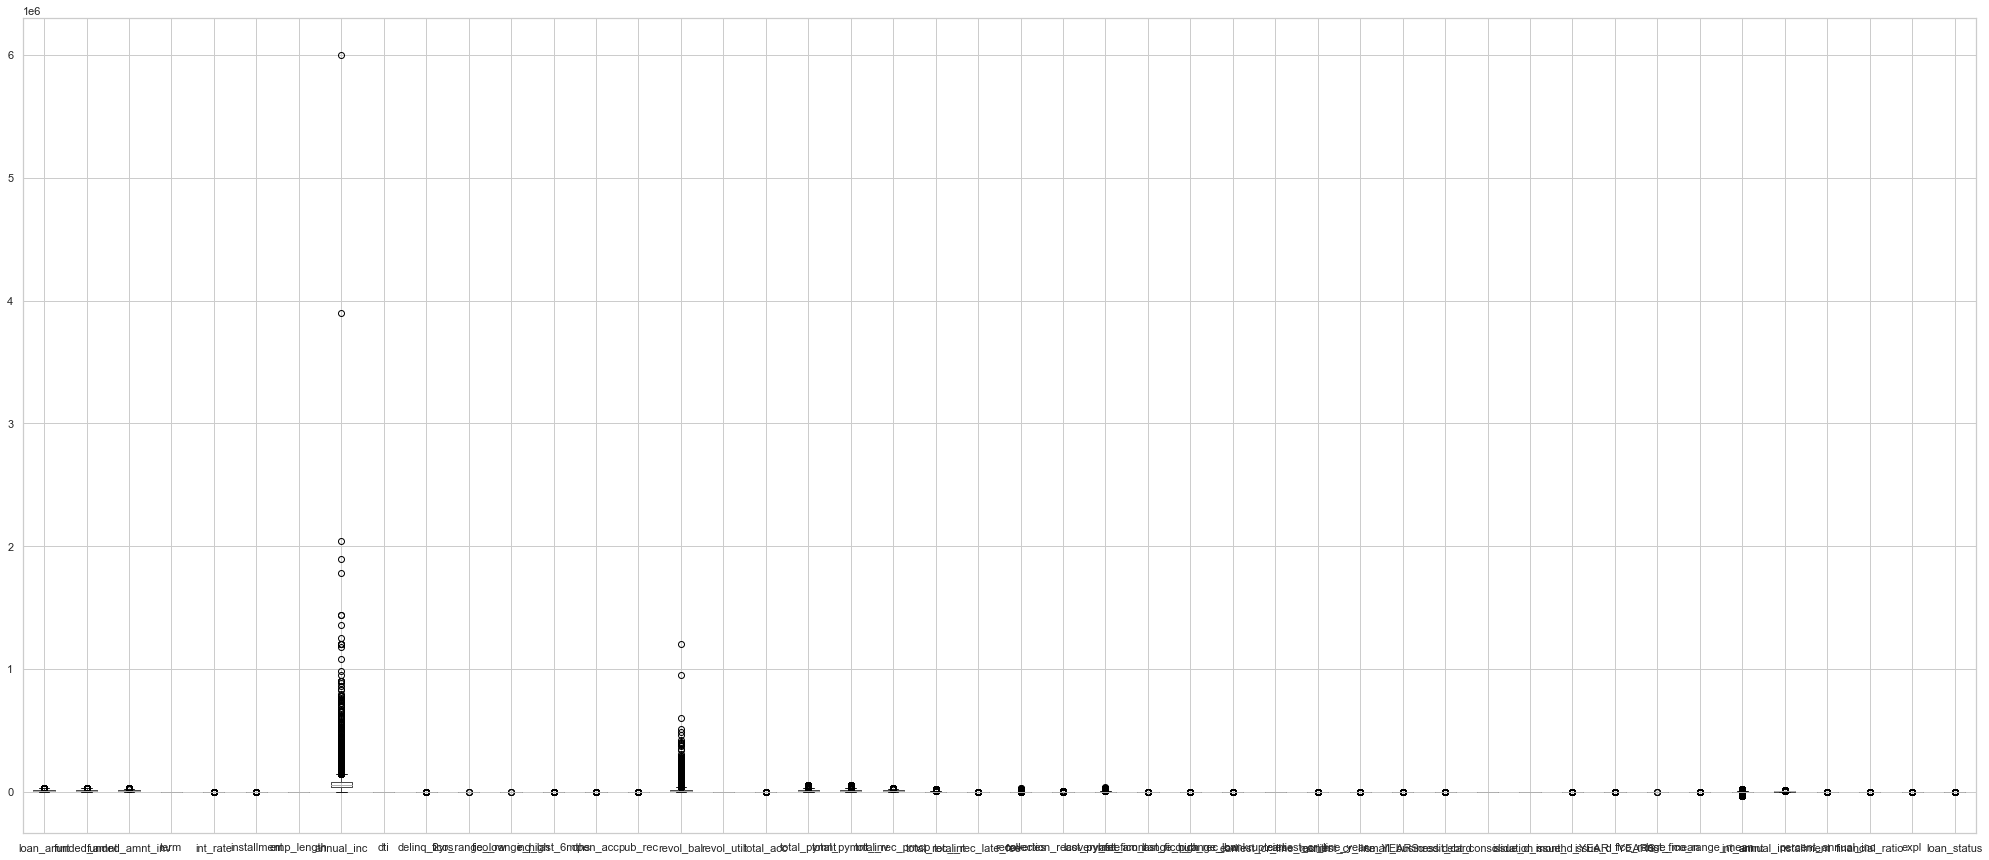

In [36]:
df_FE.boxplot(figsize=(35,15))

In [37]:
print('Number of outliers in last_fico_range_high: ',df_FE2[((df_FE2.last_fico_range_high - df_FE2.last_fico_range_high.mean()) / df_FE2.last_fico_range_high.std()).abs() >3]['last_fico_range_high'].count())
print('Number of outliers in fico_range_high: ',df_FE2[((df_FE2.fico_range_high - df_FE2.fico_range_high.mean()) / df_FE2.fico_range_high.std()).abs() >3]['fico_range_high'].count())
print('Number of outliers in earliest_cr_line_YEARS: ',df_FE[((df_FE2.earliest_cr_line_YEARS - df_FE2.earliest_cr_line_YEARS.mean()) / df_FE2.earliest_cr_line_YEARS.std()).abs() >3]['earliest_cr_line_YEARS'].count())
print('Number of outliers in annual_inc: ',df_FE2[((df_FE2.annual_inc - df_FE2.annual_inc.mean()) / df_FE2.annual_inc.std()).abs() >3]['annual_inc'].count())
print('Number of outliers in loan_amnt: ',df_FE2[((df_FE2.loan_amnt - df_FE2.loan_amnt.mean()) / df_FE2.loan_amnt.std()).abs() >3]['loan_amnt'].count())
print('Number of outliers in revol_bal: ',df_FE2[((df_FE2.revol_bal - df_FE2.revol_bal.mean()) / df_FE2.revol_bal.std()).abs() >3]['revol_bal'].count())

Number of outliers in last_fico_range_high:  24
Number of outliers in fico_range_high:  3
Number of outliers in earliest_cr_line_YEARS:  631
Number of outliers in annual_inc:  341
Number of outliers in loan_amnt:  729
Number of outliers in revol_bal:  678


In [38]:
X = df_FE2.iloc[:, :-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df_FE = pd.DataFrame(X_scaled,columns=X.columns)

<AxesSubplot:>

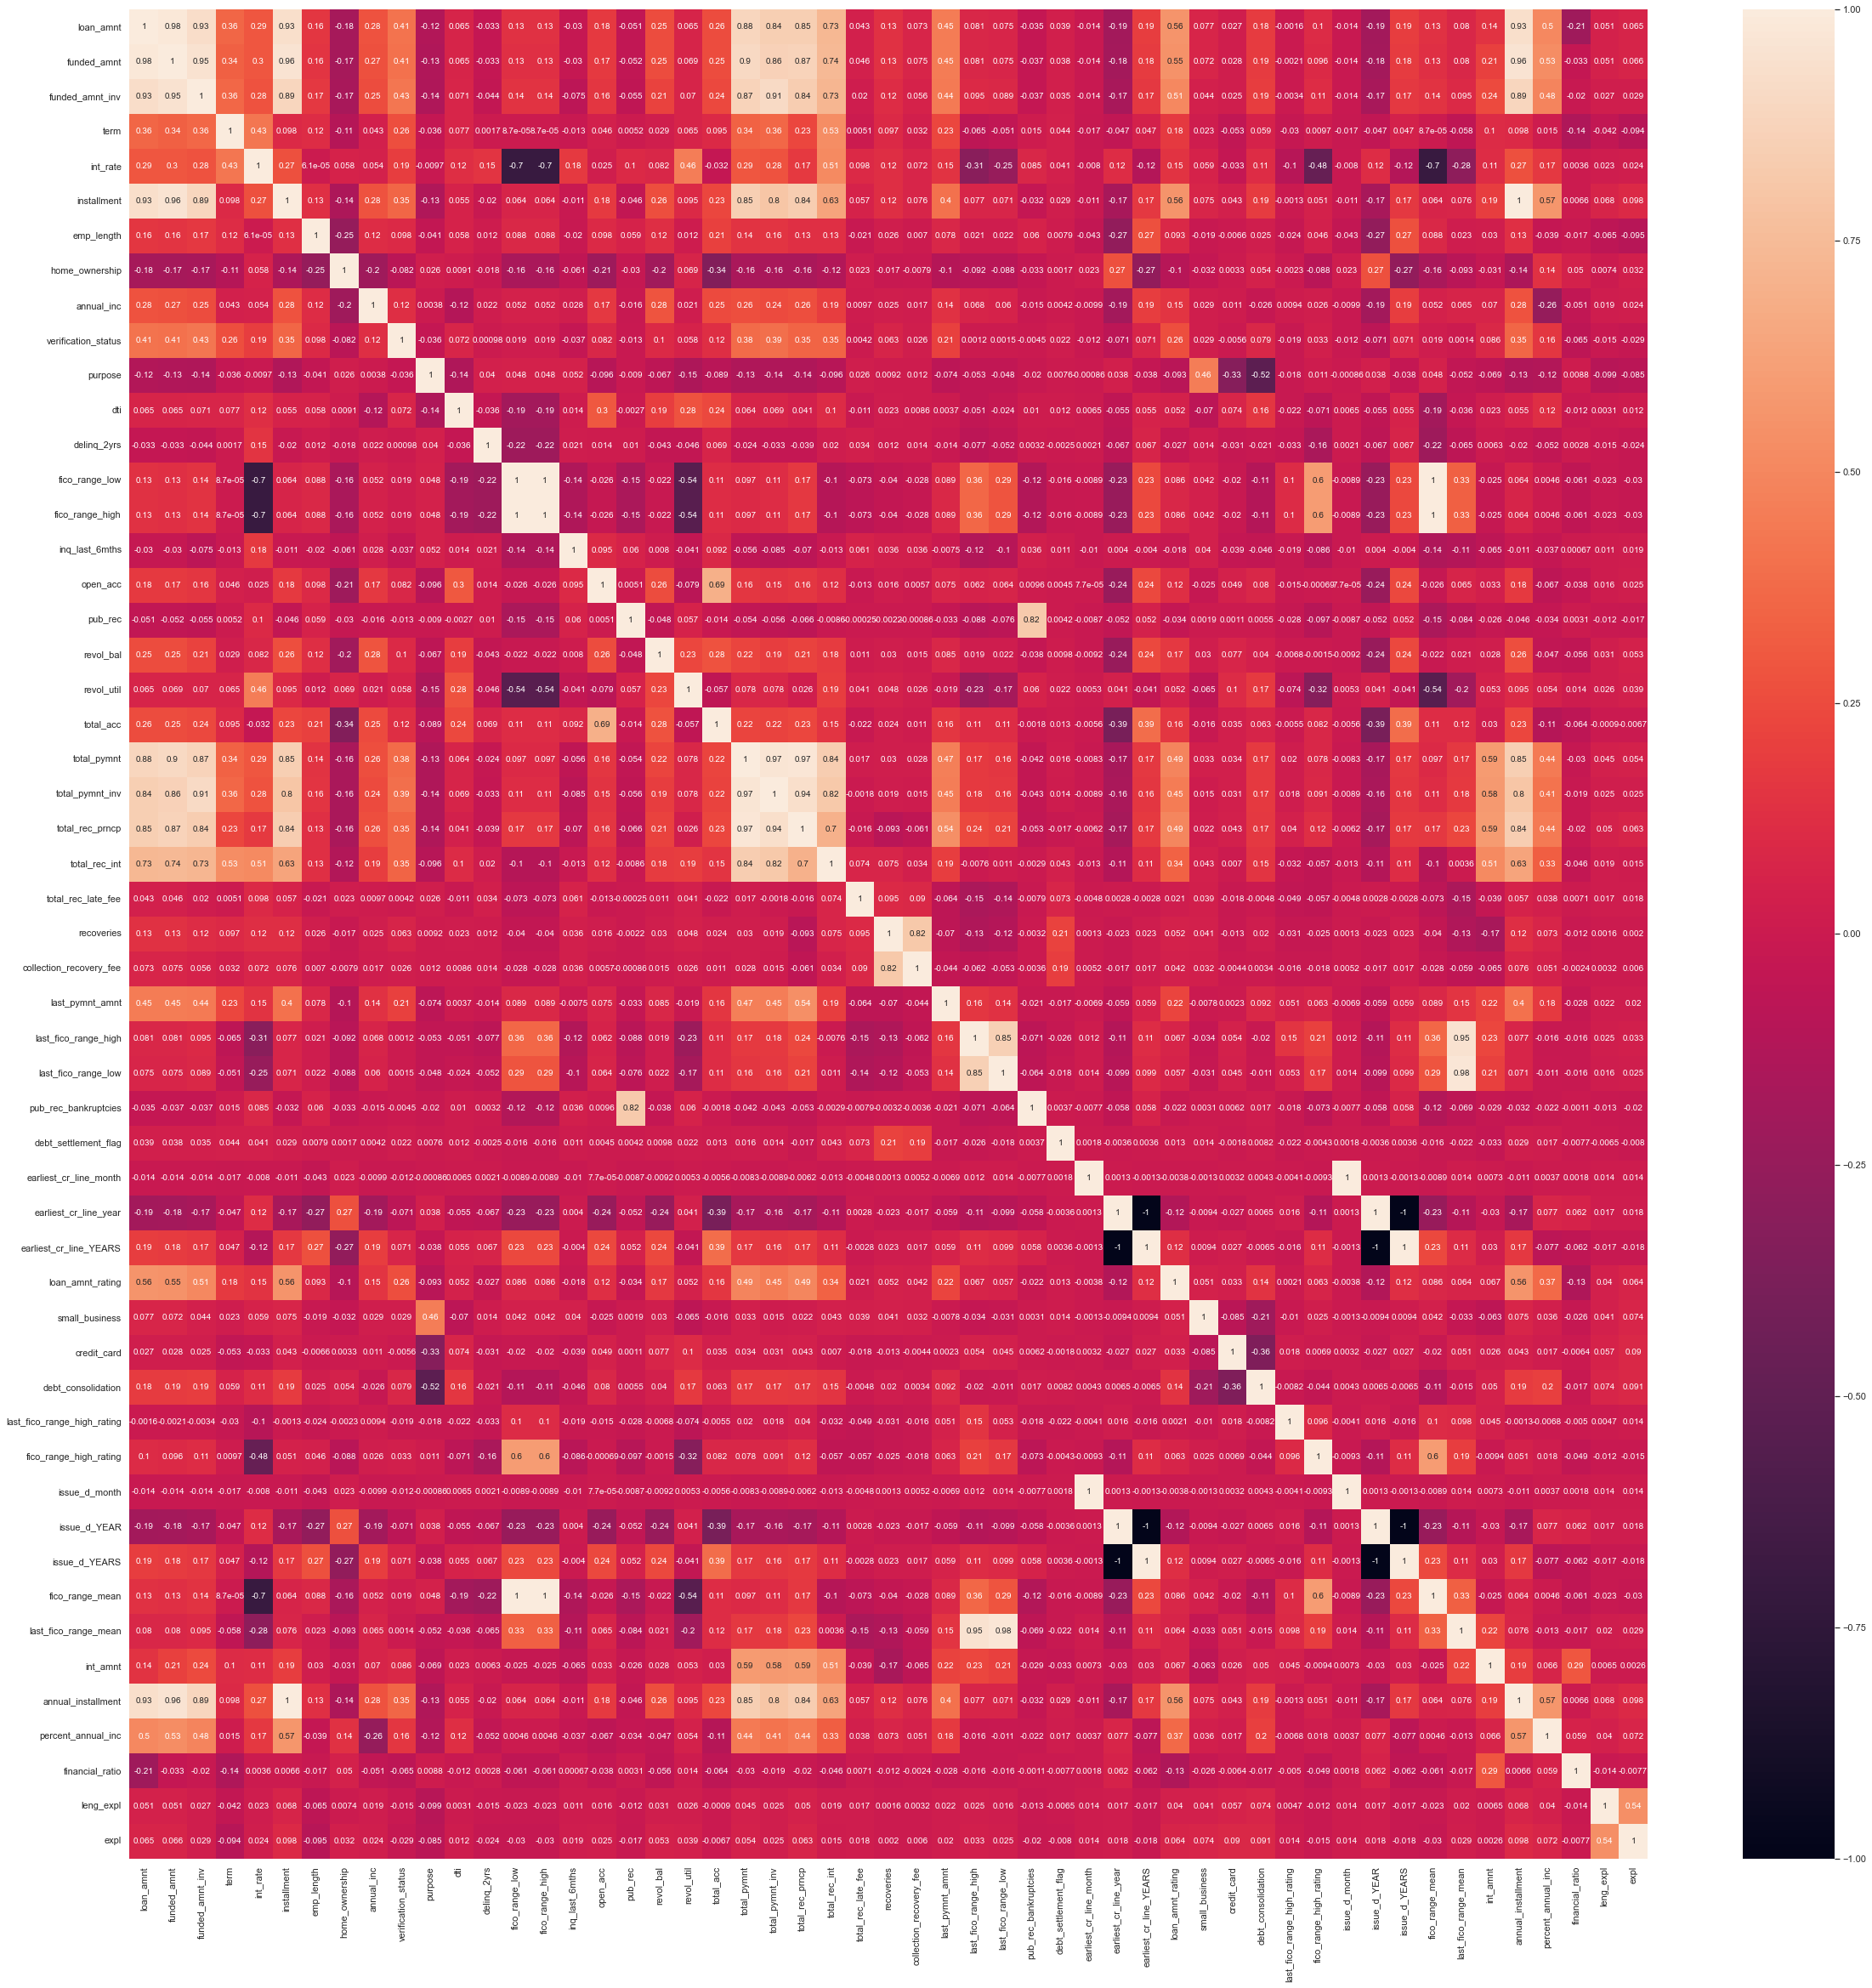

In [39]:
plt.figure(figsize = (40,40))       
sns.heatmap(X_scaled_df_FE.corr(),annot = True)

In [40]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_scaled)

pca.components_[0]

pca.explained_variance_ratio_

var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.19021191, 0.29932549, 0.37480687, 0.42386496, 0.46214664,
       0.49892991, 0.53394684, 0.56756428, 0.59905531, 0.63016784,
       0.65587004, 0.68086921, 0.70558435, 0.72825267, 0.74966607,
       0.76871411, 0.7872396 , 0.80508199, 0.82214439, 0.83897752,
       0.85418302, 0.86880417, 0.88251873, 0.89584192, 0.90861778,
       0.92040534, 0.93193239, 0.94276736, 0.95277202, 0.96138194,
       0.96940614, 0.97518312, 0.97992073, 0.98323515, 0.98649514,
       0.98961083, 0.99260782, 0.99522297, 0.99740918, 0.99940026,
       0.99981675, 0.99995712, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

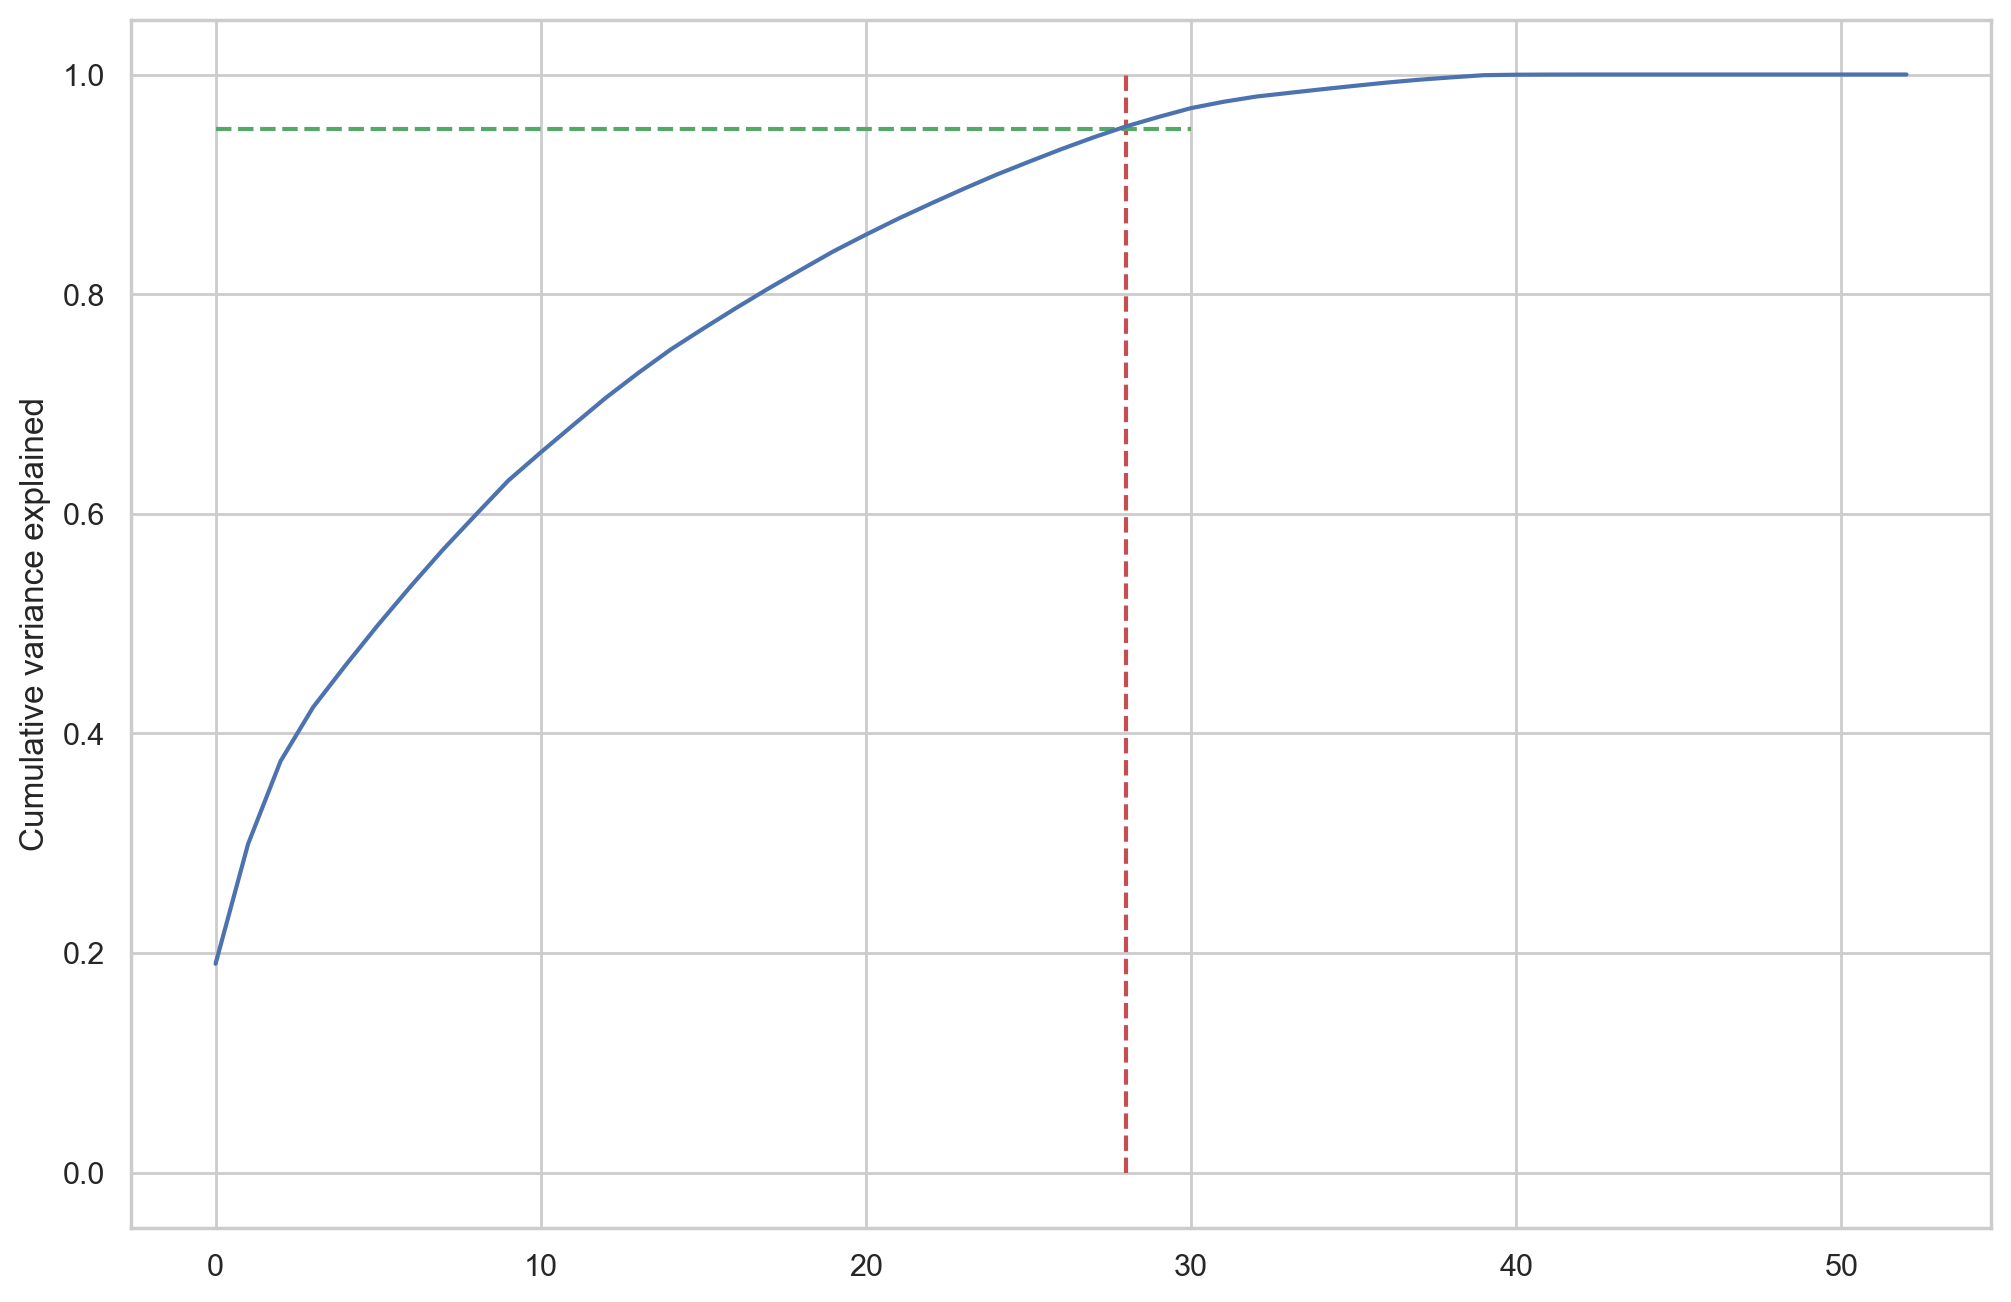

In [41]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=28, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [42]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=28)
X_pca_final = pca_final.fit_transform(X_scaled)

In [43]:
print(X.shape)
print(X_pca_final.shape)

(42535, 53)
(42535, 28)


In [44]:
corrmat = np.corrcoef(X_pca_final.transpose())

corrmat.shape

(28, 28)

<AxesSubplot:>

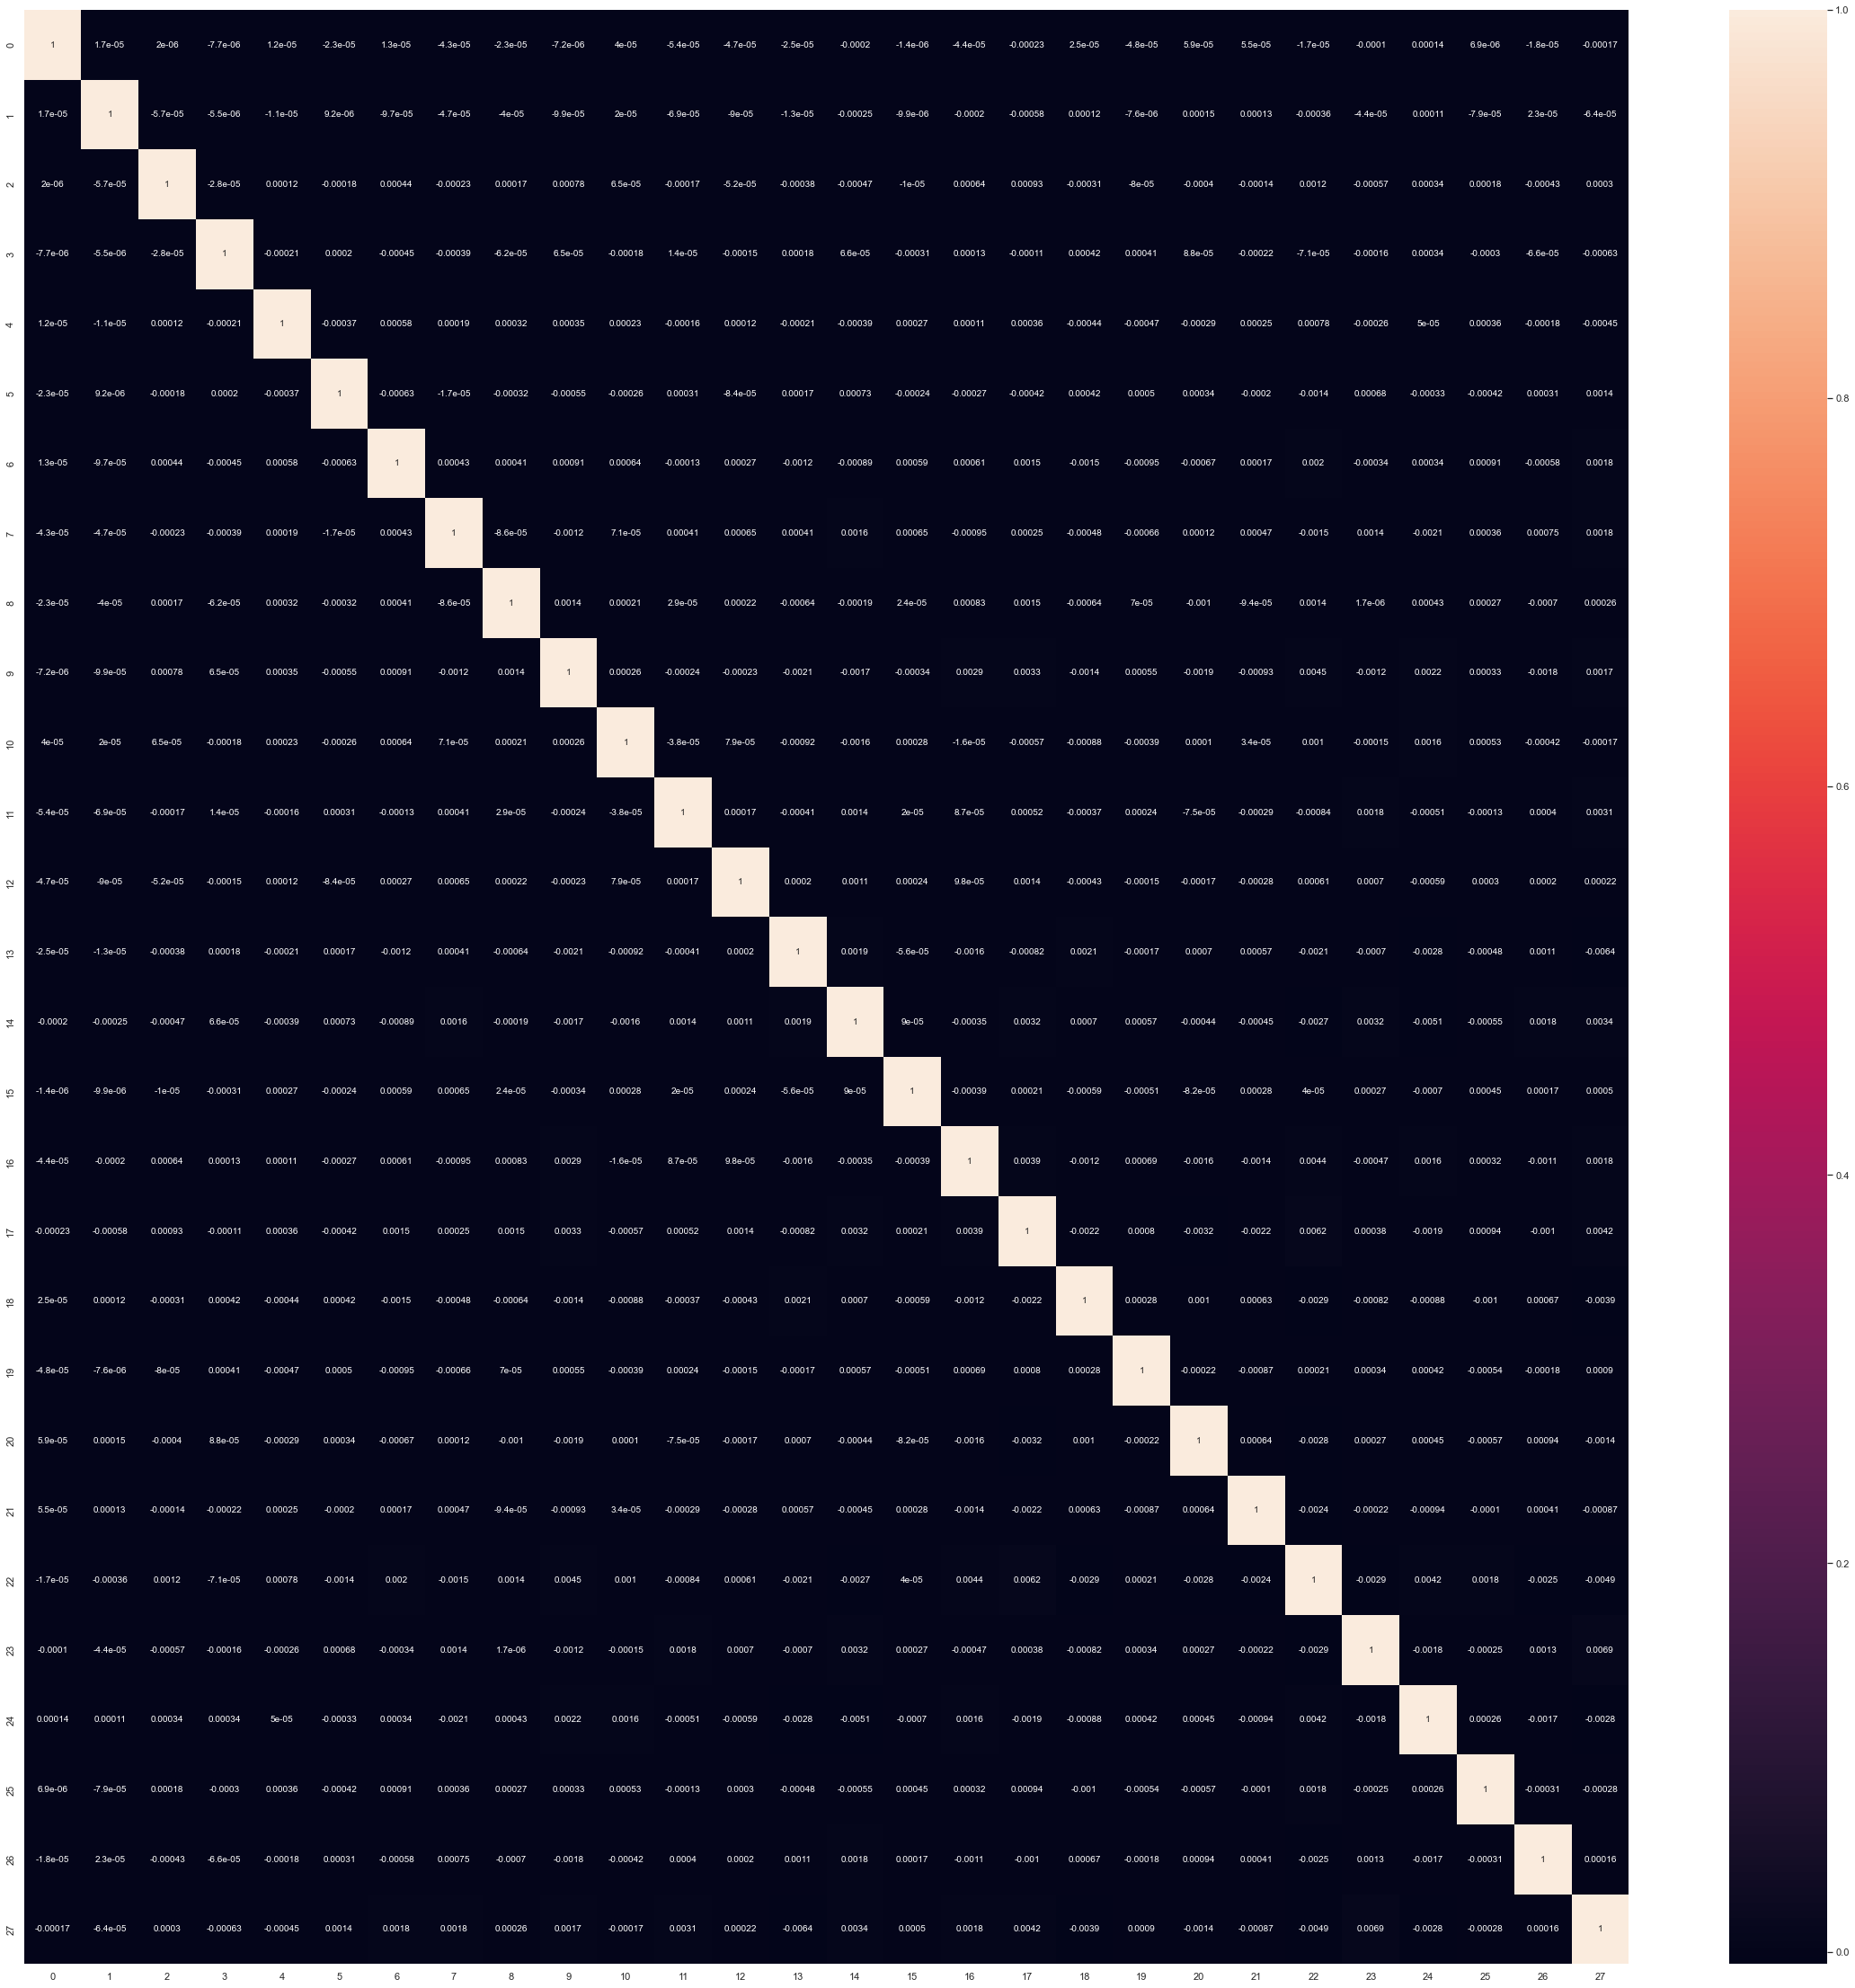

In [45]:
plt.figure(figsize=[40,40])
sns.heatmap(corrmat, annot=True)

In [46]:
colnames = list(X.columns)
pca_df_FE = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df_FE[:59]

,PC1,PC2,Feature
0,0.295447,-0.056332,loan_amnt
1,0.298903,-0.062015,funded_amnt
2,0.291769,-0.054536,funded_amnt_inv
3,0.107466,-0.072259,term
4,0.075017,-0.323057,int_rate
5,0.284140,-0.071835,installment
6,0.070907,0.060436,emp_length
7,-0.079115,-0.099669,home_ownership
8,0.099852,0.035541,annual_inc
9,0.136490,-0.048676,verification_status


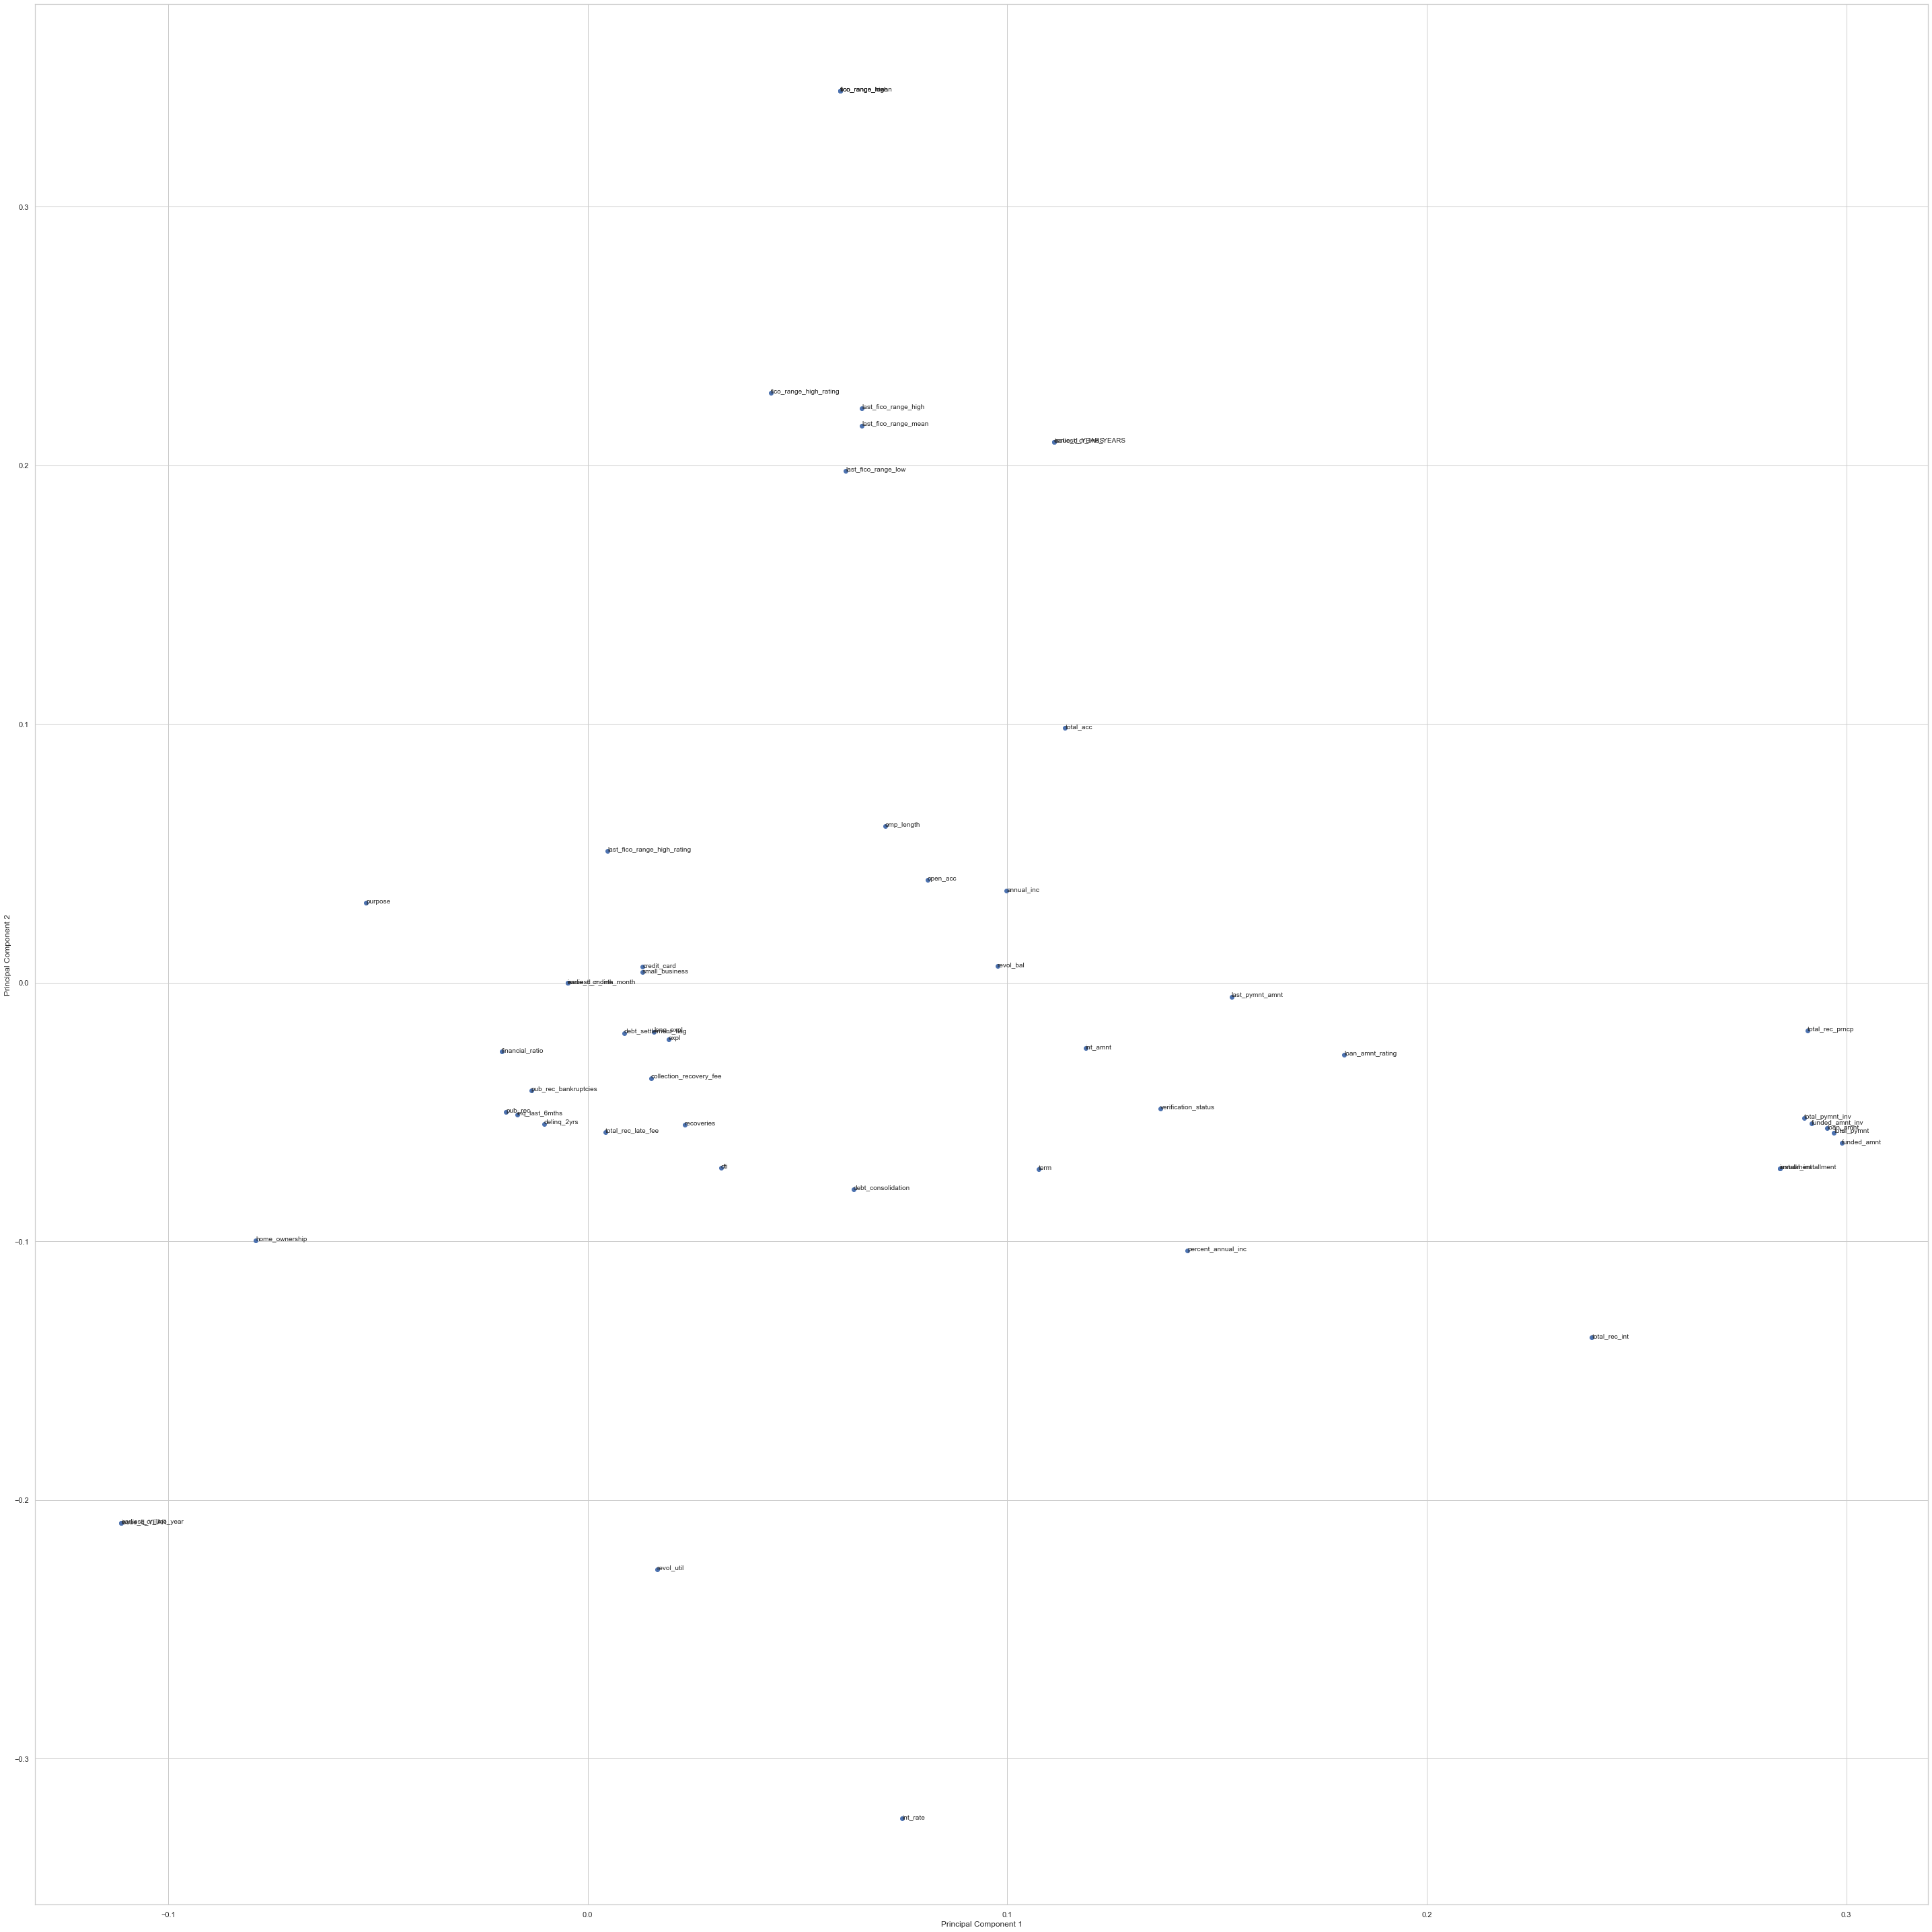

In [47]:
fig = plt.figure(figsize = (40,40))
plt.scatter(pca_df_FE.PC1, pca_df_FE.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df_FE.Feature):
    plt.annotate(txt, (pca_df_FE.PC1[i],pca_df_FE.PC2[i]))
plt.tight_layout()
plt.show()

#### Optymalizacja modelu dla danych bez outliersow

In [48]:
# jeszcze raz DF bez outliersow

X=df_FE2.iloc[:, :-1]
y=df_FE2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score

dtree = DecisionTreeClassifier()

In [50]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred = dtree.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dtree.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dtree.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 1.0
Performance on testing data using DT: 0.9991379985894523
Accuracy DT:  0.9931106900107435
MSE:  0.0008620014105477627


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[ 1863     8]
 [    3 10887]]


In [53]:
print('Precision:', cm[0,0]/(cm[0,0]+cm[1,0]))
print('Recall:', cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:', cm[1,1]/(cm[1,1]+cm[1,0]))

Precision: 0.9983922829581994
Recall: 0.9957242116515232
Specificity: 0.9997245179063361


In [54]:
metrics.roc_auc_score(y_pred,y_test)

0.998829000588783

[Text(0.3664772727272727, 0.9642857142857143, 'X[26] <= 0.005\ngini = 0.259\nsamples = 29774\nvalue = [4560, 25214]'),
 Text(0.3210227272727273, 0.8928571428571429, 'X[23] <= 468.065\ngini = 0.003\nsamples = 25257\nvalue = [43, 25214]'),
 Text(0.2755681818181818, 0.8214285714285714, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.3664772727272727, 0.8214285714285714, 'X[32] <= 0.5\ngini = 0.002\nsamples = 25243\nvalue = [29, 25214]'),
 Text(0.3210227272727273, 0.75, 'X[47] <= -6186.776\ngini = 0.002\nsamples = 25236\nvalue = [22, 25214]'),
 Text(0.13636363636363635, 0.6785714285714286, 'X[50] <= 0.861\ngini = 0.095\nsamples = 160\nvalue = [8, 152]'),
 Text(0.09090909090909091, 0.6071428571428571, 'X[24] <= 7223.77\ngini = 0.013\nsamples = 153\nvalue = [1, 152]'),
 Text(0.045454545454545456, 0.5357142857142857, 'gini = 0.0\nsamples = 152\nvalue = [0, 152]'),
 Text(0.13636363636363635, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.18181818181818182, 0.6071

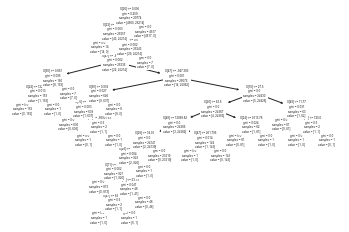

In [55]:
from sklearn import tree

tree.plot_tree(dtree)

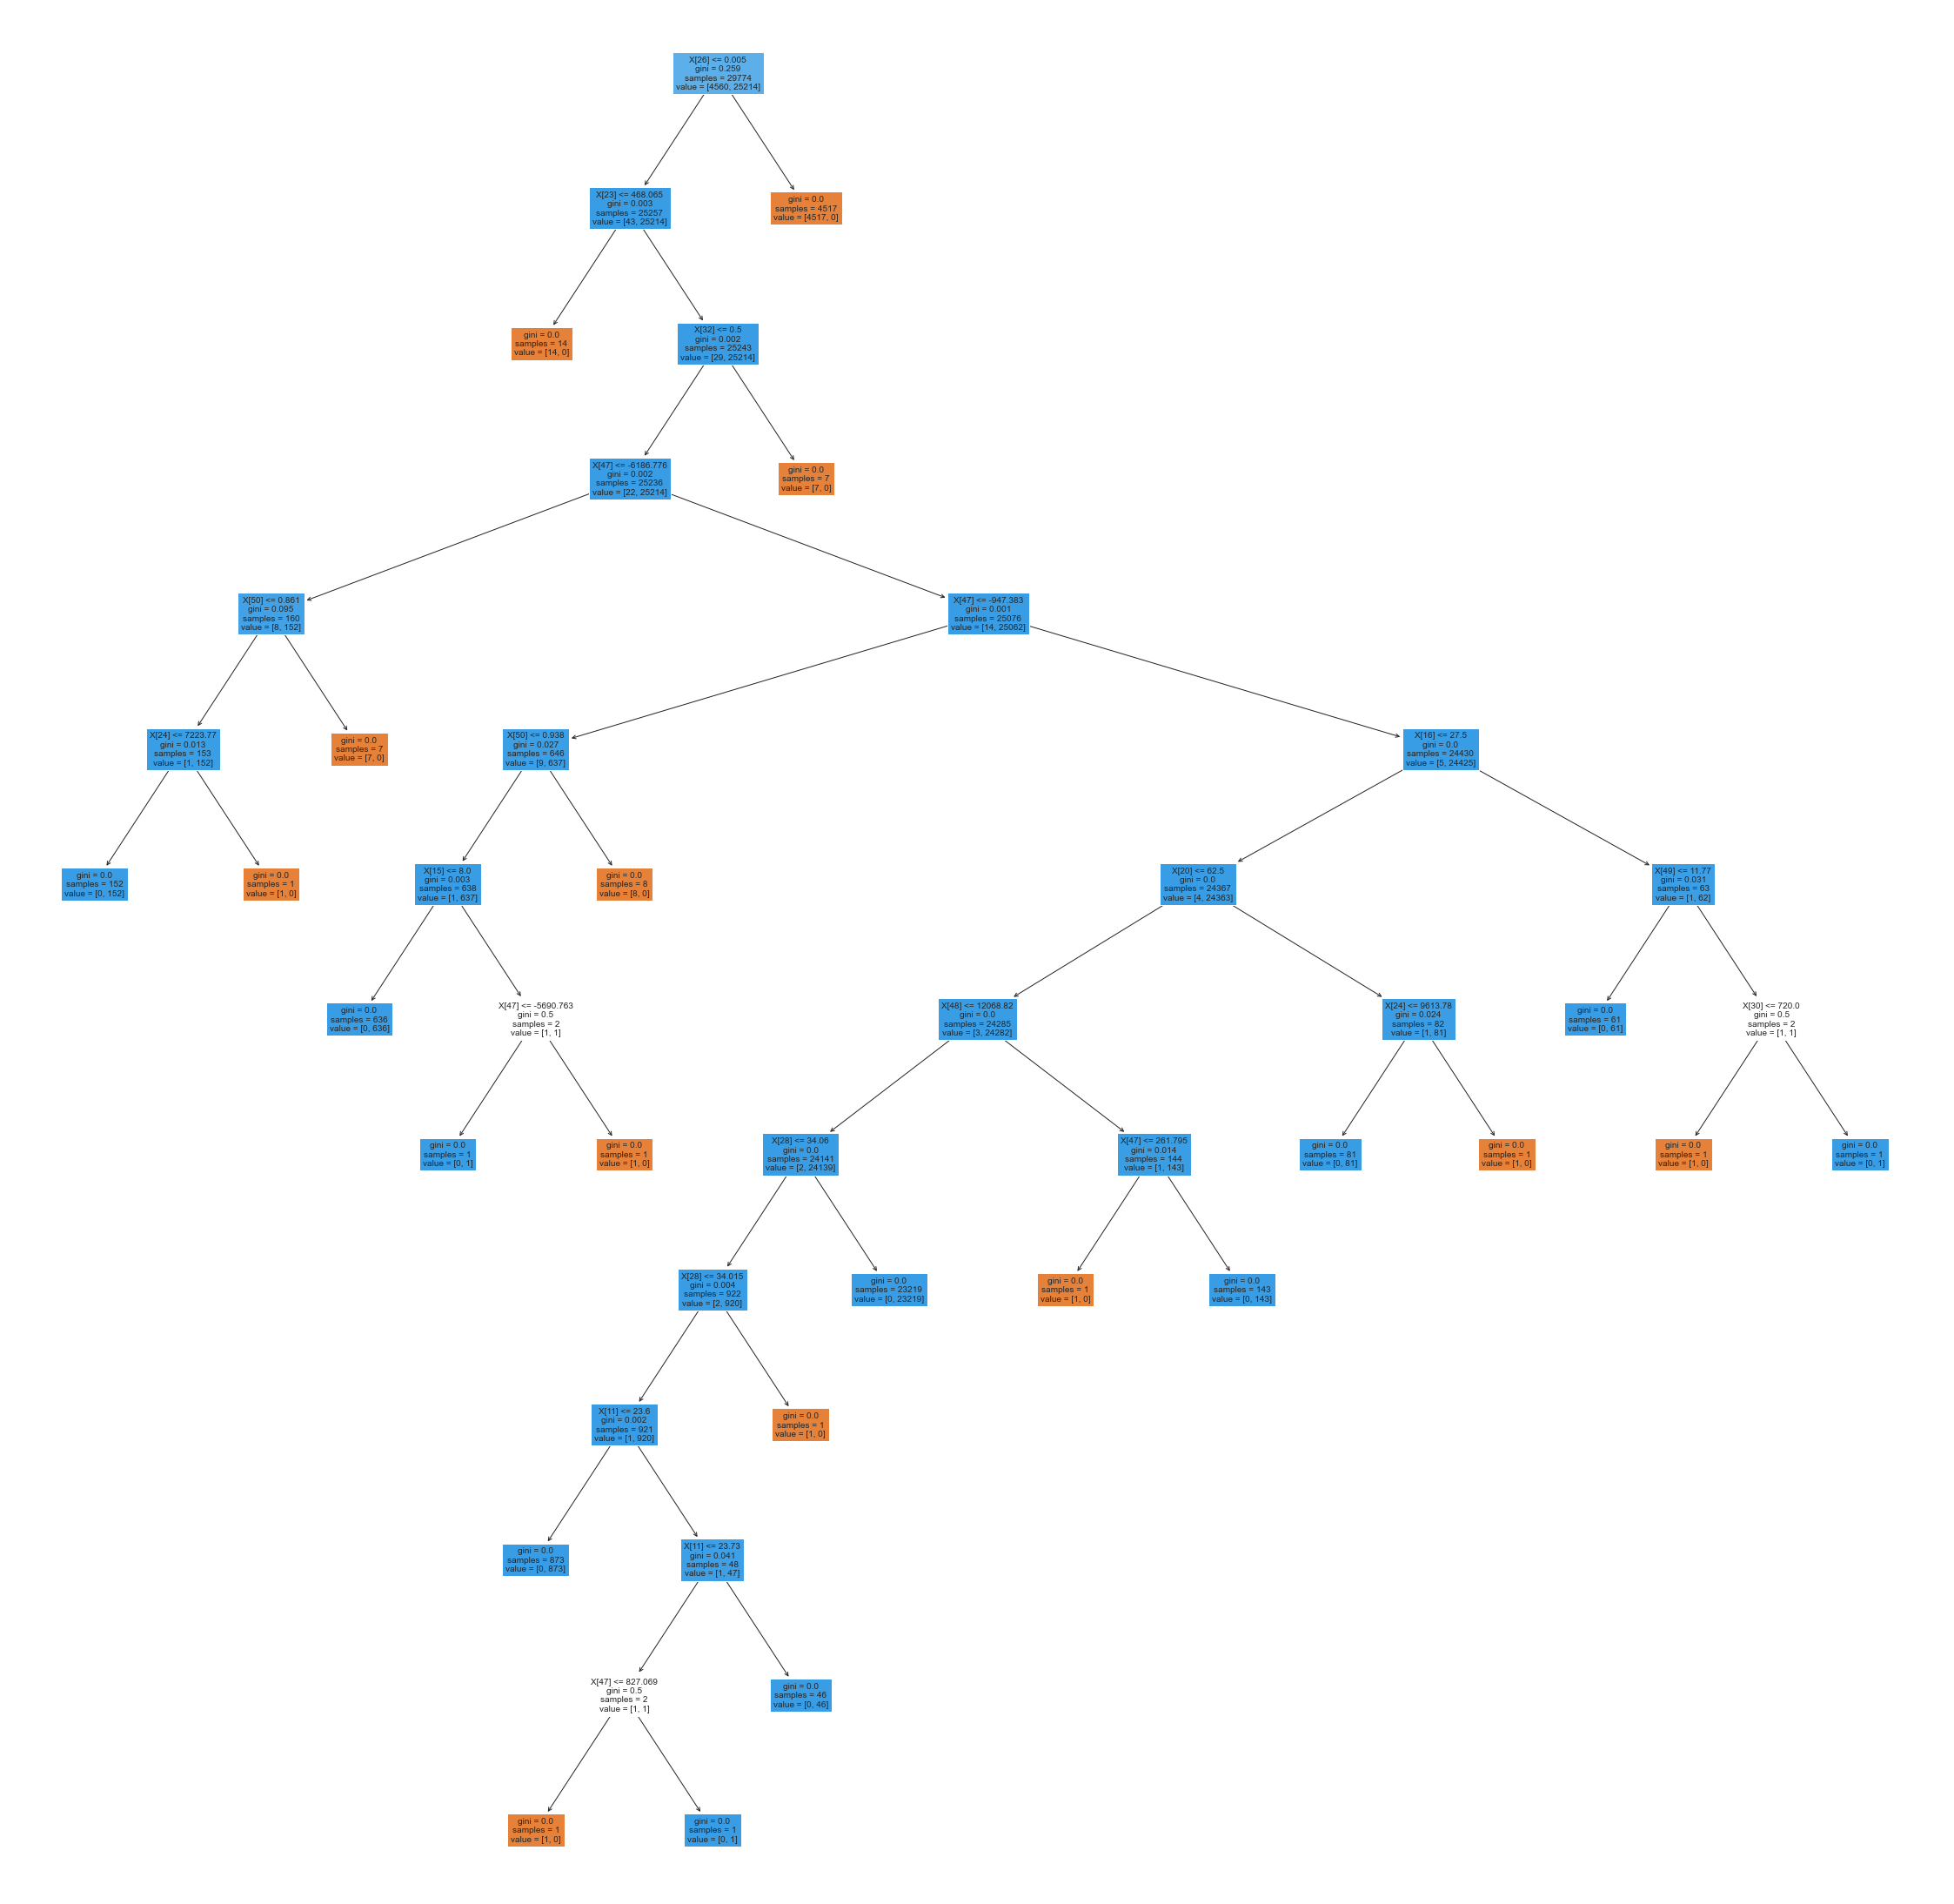

In [56]:
from sklearn import tree

plt.figure(figsize=(40,40))
tree.plot_tree(dtree, fontsize=10, filled=True)
plt.show()

In [57]:
print('Feature importances: \n',pd.DataFrame(dtree.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                                   Imp
loan_amnt                    0.000000
funded_amnt                  0.000000
funded_amnt_inv              0.000000
term                         0.000000
int_rate                     0.000000
installment                  0.000000
emp_length                   0.000000
home_ownership               0.000000
annual_inc                   0.000000
verification_status          0.000000
purpose                      0.000000
dti                          0.000129
delinq_2yrs                  0.000000
fico_range_low               0.000000
fico_range_high              0.000000
inq_last_6mths               0.000129
open_acc                     0.000004
pub_rec                      0.000000
revol_bal                    0.000000
revol_util                   0.000000
total_acc                    0.000003
total_pymnt                  0.000000
total_pymnt_inv              0.000000
total_rec_prncp              0.003615
total_rec_int              

Cechy brane pod uwage podczas wyliczania modelu:

Feature importances: 
                                   Imp

* funded_amnt_inv              0.000029
* dti                          0.000131
* total_pymnt_inv              0.000131
* total_rec_prncp              0.004307
***
* recoveries                   0.986639
***
* last_pymnt_amnt              0.000263
* debt_settlement_flag         0.002357
* earliest_cr_line_YEARS       0.000263
* issue_d_month                0.000233
* int_amnt                     0.000175
* annual_installment           0.000230
* percent_annual_inc           0.000127
* financial_ratio              0.005103


In [58]:
#usunięcie wartości nadmiarowych
df_FE2dt=df_FE2.copy()

In [59]:
X = df_FE2dt.drop( ['loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',  'total_rec_int',
       'total_rec_late_fee',  'collection_recovery_fee',
       'last_fico_range_high', 'last_fico_range_low',
       'pub_rec_bankruptcies', 
       'earliest_cr_line_month', 
       'earliest_cr_line_YEARS', 'loan_amnt_rating', 'small_business',
       'credit_card', 'debt_consolidation', 'last_fico_range_high_rating',
        'issue_d_month', 'issue_d_YEAR',
       'issue_d_YEARS', 'fico_range_mean', 'last_fico_range_mean', 'int_amnt','expl', 'loan_status'] , axis=1)
y = df_FE2dt['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [60]:
dtreen = DecisionTreeClassifier()
dtreen.fit(X_train , y_train)

DecisionTreeClassifier()

In [61]:
y_pred = dtreen.predict(X_test)
print('Performance on training data using DT:',dtreen.score(X_train,y_train))
print('Performance on testing data using DT:',dtreen.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 1.0
Performance on testing data using DT: 0.9988245435310712
Accuracy DT:  0.9906673492522031


In [62]:
def evaluate(y_pred,y_test): 
    result = classification_report(y_test,y_pred,output_dict=True)
    f1 = result['1']['f1-score']

    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [63]:
print(classification_report(y_test,y_pred))

dtree_pr= evaluate(y_pred,y_test)
dtree_pr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1886
           1       1.00      1.00      1.00     10875

    accuracy                           1.00     12761
   macro avg       1.00      1.00      1.00     12761
weighted avg       1.00      1.00      1.00     12761



{'f1-score': 1.0, 'accuracy': 1.0}

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[ 1878     8]
 [    7 10868]]


In [65]:
print('Precision:', cm[0,0]/(cm[0,0]+cm[1,0]))
print('Recall:', cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:', cm[1,1]/(cm[1,1]+cm[1,0]))

Precision: 0.9962864721485412
Recall: 0.9957582184517497
Specificity: 0.9993563218390804


In [66]:
metrics.roc_auc_score(y_pred,y_test)

0.9977754538013761

[Text(0.3223958333333333, 0.9615384615384616, 'X[6] <= 0.005\ngini = 0.259\nsamples = 29774\nvalue = [4545, 25229]'),
 Text(0.2890625, 0.8846153846153846, 'X[5] <= 468.065\ngini = 0.004\nsamples = 25279\nvalue = [50, 25229]'),
 Text(0.2557291666666667, 0.8076923076923077, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.3223958333333333, 0.8076923076923077, 'X[8] <= 0.5\ngini = 0.003\nsamples = 25262\nvalue = [33, 25229]'),
 Text(0.2890625, 0.7307692307692307, 'X[7] <= 57.425\ngini = 0.002\nsamples = 25255\nvalue = [26, 25229]'),
 Text(0.16666666666666666, 0.6538461538461539, 'X[7] <= 57.27\ngini = 0.017\nsamples = 1404\nvalue = [12, 1392]'),
 Text(0.13333333333333333, 0.5769230769230769, 'X[2] <= 27.5\ngini = 0.016\nsamples = 1403\nvalue = [11, 1392]'),
 Text(0.06666666666666667, 0.5, 'X[7] <= 26.98\ngini = 0.014\nsamples = 1400\nvalue = [10, 1390]'),
 Text(0.03333333333333333, 0.4230769230769231, 'gini = 0.0\nsamples = 843\nvalue = [0, 843]'),
 Text(0.1, 0.4230769230769231, 'X[7

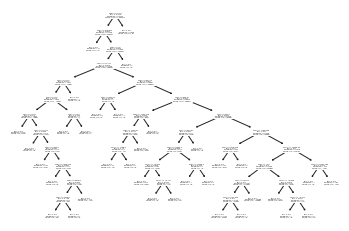

In [67]:
from sklearn import tree

tree.plot_tree(dtreen)

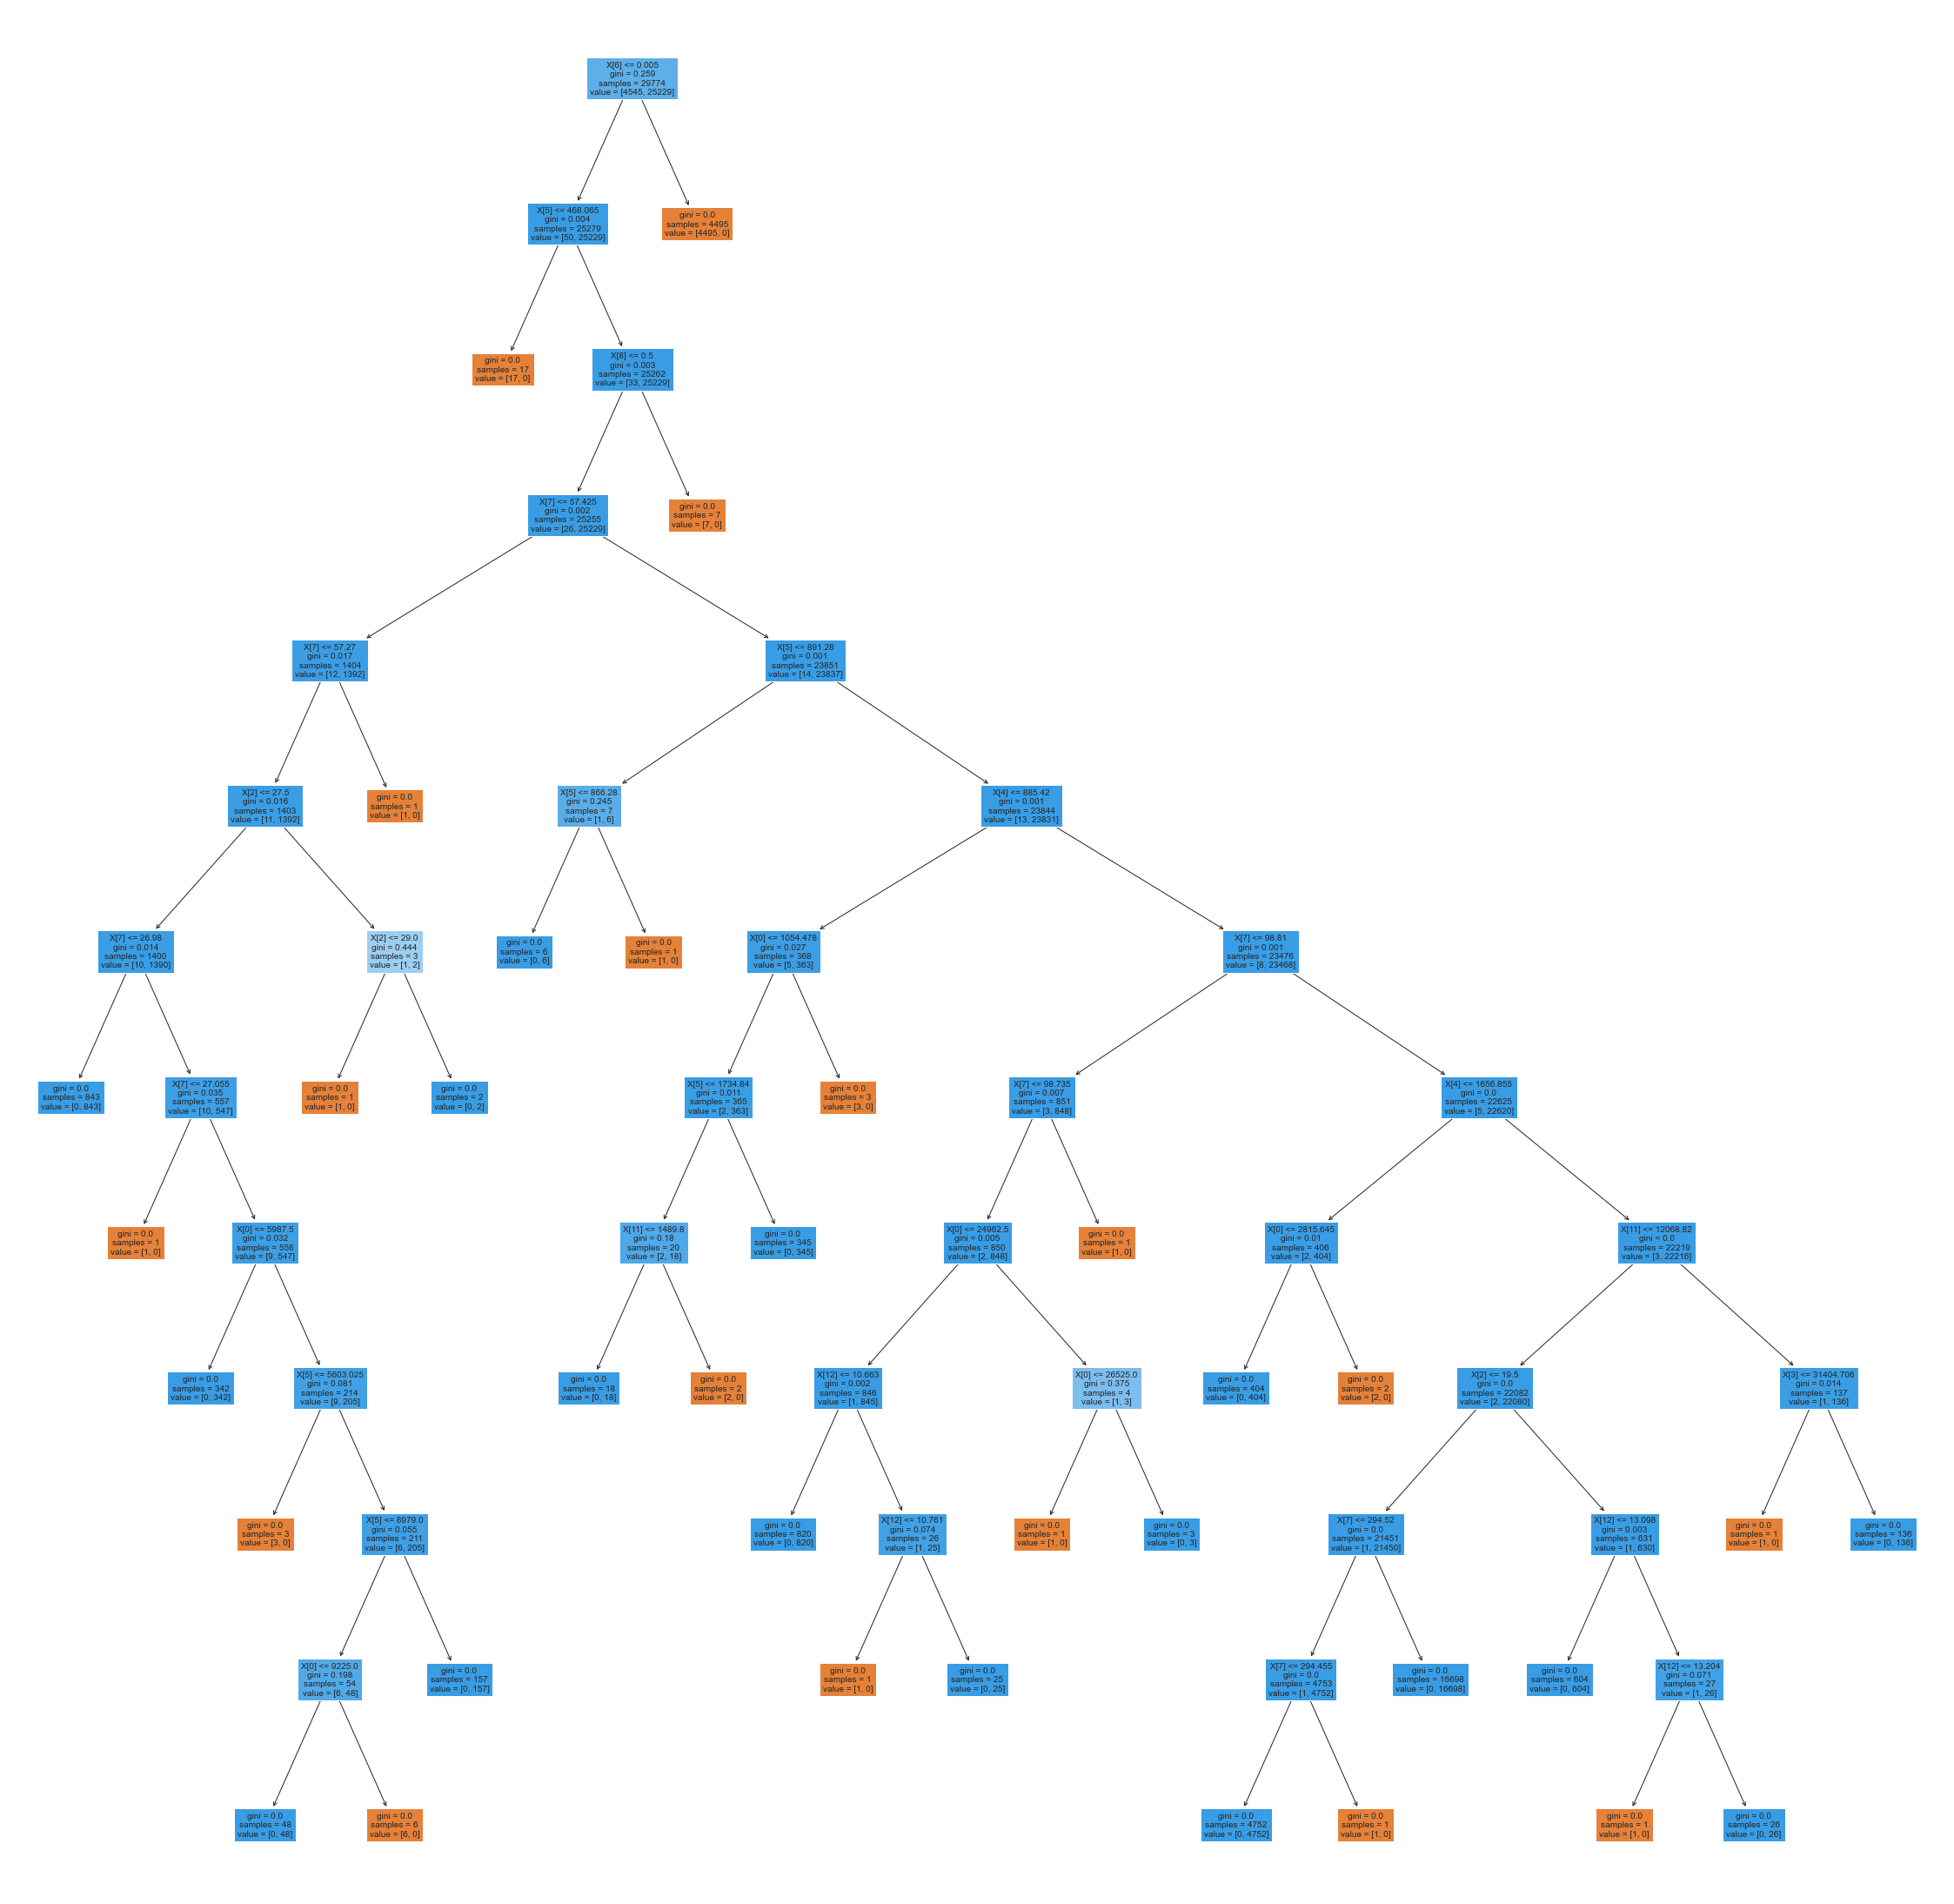

In [68]:
from sklearn import tree

plt.figure(figsize=(40,40))
tree.plot_tree(dtreen, fontsize=10, filled=True)
plt.show()

`Brak balansu w targecie powoduje, ze model jest przetrenowany.`

#### Balansowanie zbioru 

In [69]:
from imblearn.over_sampling import SMOTE

X = df_FE2.iloc[:,:-1]
y = df_FE2.iloc[:,-1]

#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)


# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

#PART 2
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

In [70]:
X = df_FE2.iloc[:,:-1]
y = df_FE2.iloc[:,-1]
X_train_SMOTE, X_test, y_train_SMOTE, y_test = train_test_split(X,y,
                                                    test_size=0.30)

In [71]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_SMOTE , y_train_SMOTE)

DecisionTreeClassifier()

In [74]:
y_pred = dtree.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dtree.score(X_train_SMOTE,y_train_SMOTE))
# performance on test data
print('Performance on testing data using DT:',dtree.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 1.0
Performance on testing data using DT: 0.999373089883238
Accuracy DT:  0.9950657406633178
MSE:  0.0006269101167620093


In [75]:
print(classification_report(y_test,y_pred))

dtree_pr= evaluate(y_pred,y_test)
dtree_pr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1906
           1       1.00      1.00      1.00     10855

    accuracy                           1.00     12761
   macro avg       1.00      1.00      1.00     12761
weighted avg       1.00      1.00      1.00     12761



{'f1-score': 1.0, 'accuracy': 1.0}

In [76]:
roc_auc=metrics.roc_auc_score(y_test,y_pred)
roc_auc

0.9983338996395779

[Text(0.4895833333333333, 0.9545454545454546, 'X[26] <= 0.005\ngini = 0.258\nsamples = 29774\nvalue = [4525, 25249]'),
 Text(0.4479166666666667, 0.8636363636363636, 'X[21] <= 470.89\ngini = 0.004\nsamples = 25300\nvalue = [51, 25249]'),
 Text(0.40625, 0.7727272727272727, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.4895833333333333, 0.7727272727272727, 'X[32] <= 0.5\ngini = 0.003\nsamples = 25283\nvalue = [34, 25249]'),
 Text(0.4479166666666667, 0.6818181818181818, 'X[47] <= -20577.163\ngini = 0.002\nsamples = 25278\nvalue = [29, 25249]'),
 Text(0.40625, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4895833333333333, 0.5909090909090909, 'X[47] <= -41.168\ngini = 0.002\nsamples = 25277\nvalue = [28, 25249]'),
 Text(0.22916666666666666, 0.5, 'X[50] <= 0.986\ngini = 0.053\nsamples = 918\nvalue = [25, 893]'),
 Text(0.1875, 0.4090909090909091, 'X[23] <= 1174.28\ngini = 0.007\nsamples = 896\nvalue = [3, 893]'),
 Text(0.08333333333333333, 0.3181818181818182,

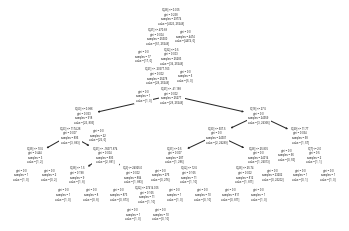

In [77]:
from sklearn import tree

tree.plot_tree(dtree)

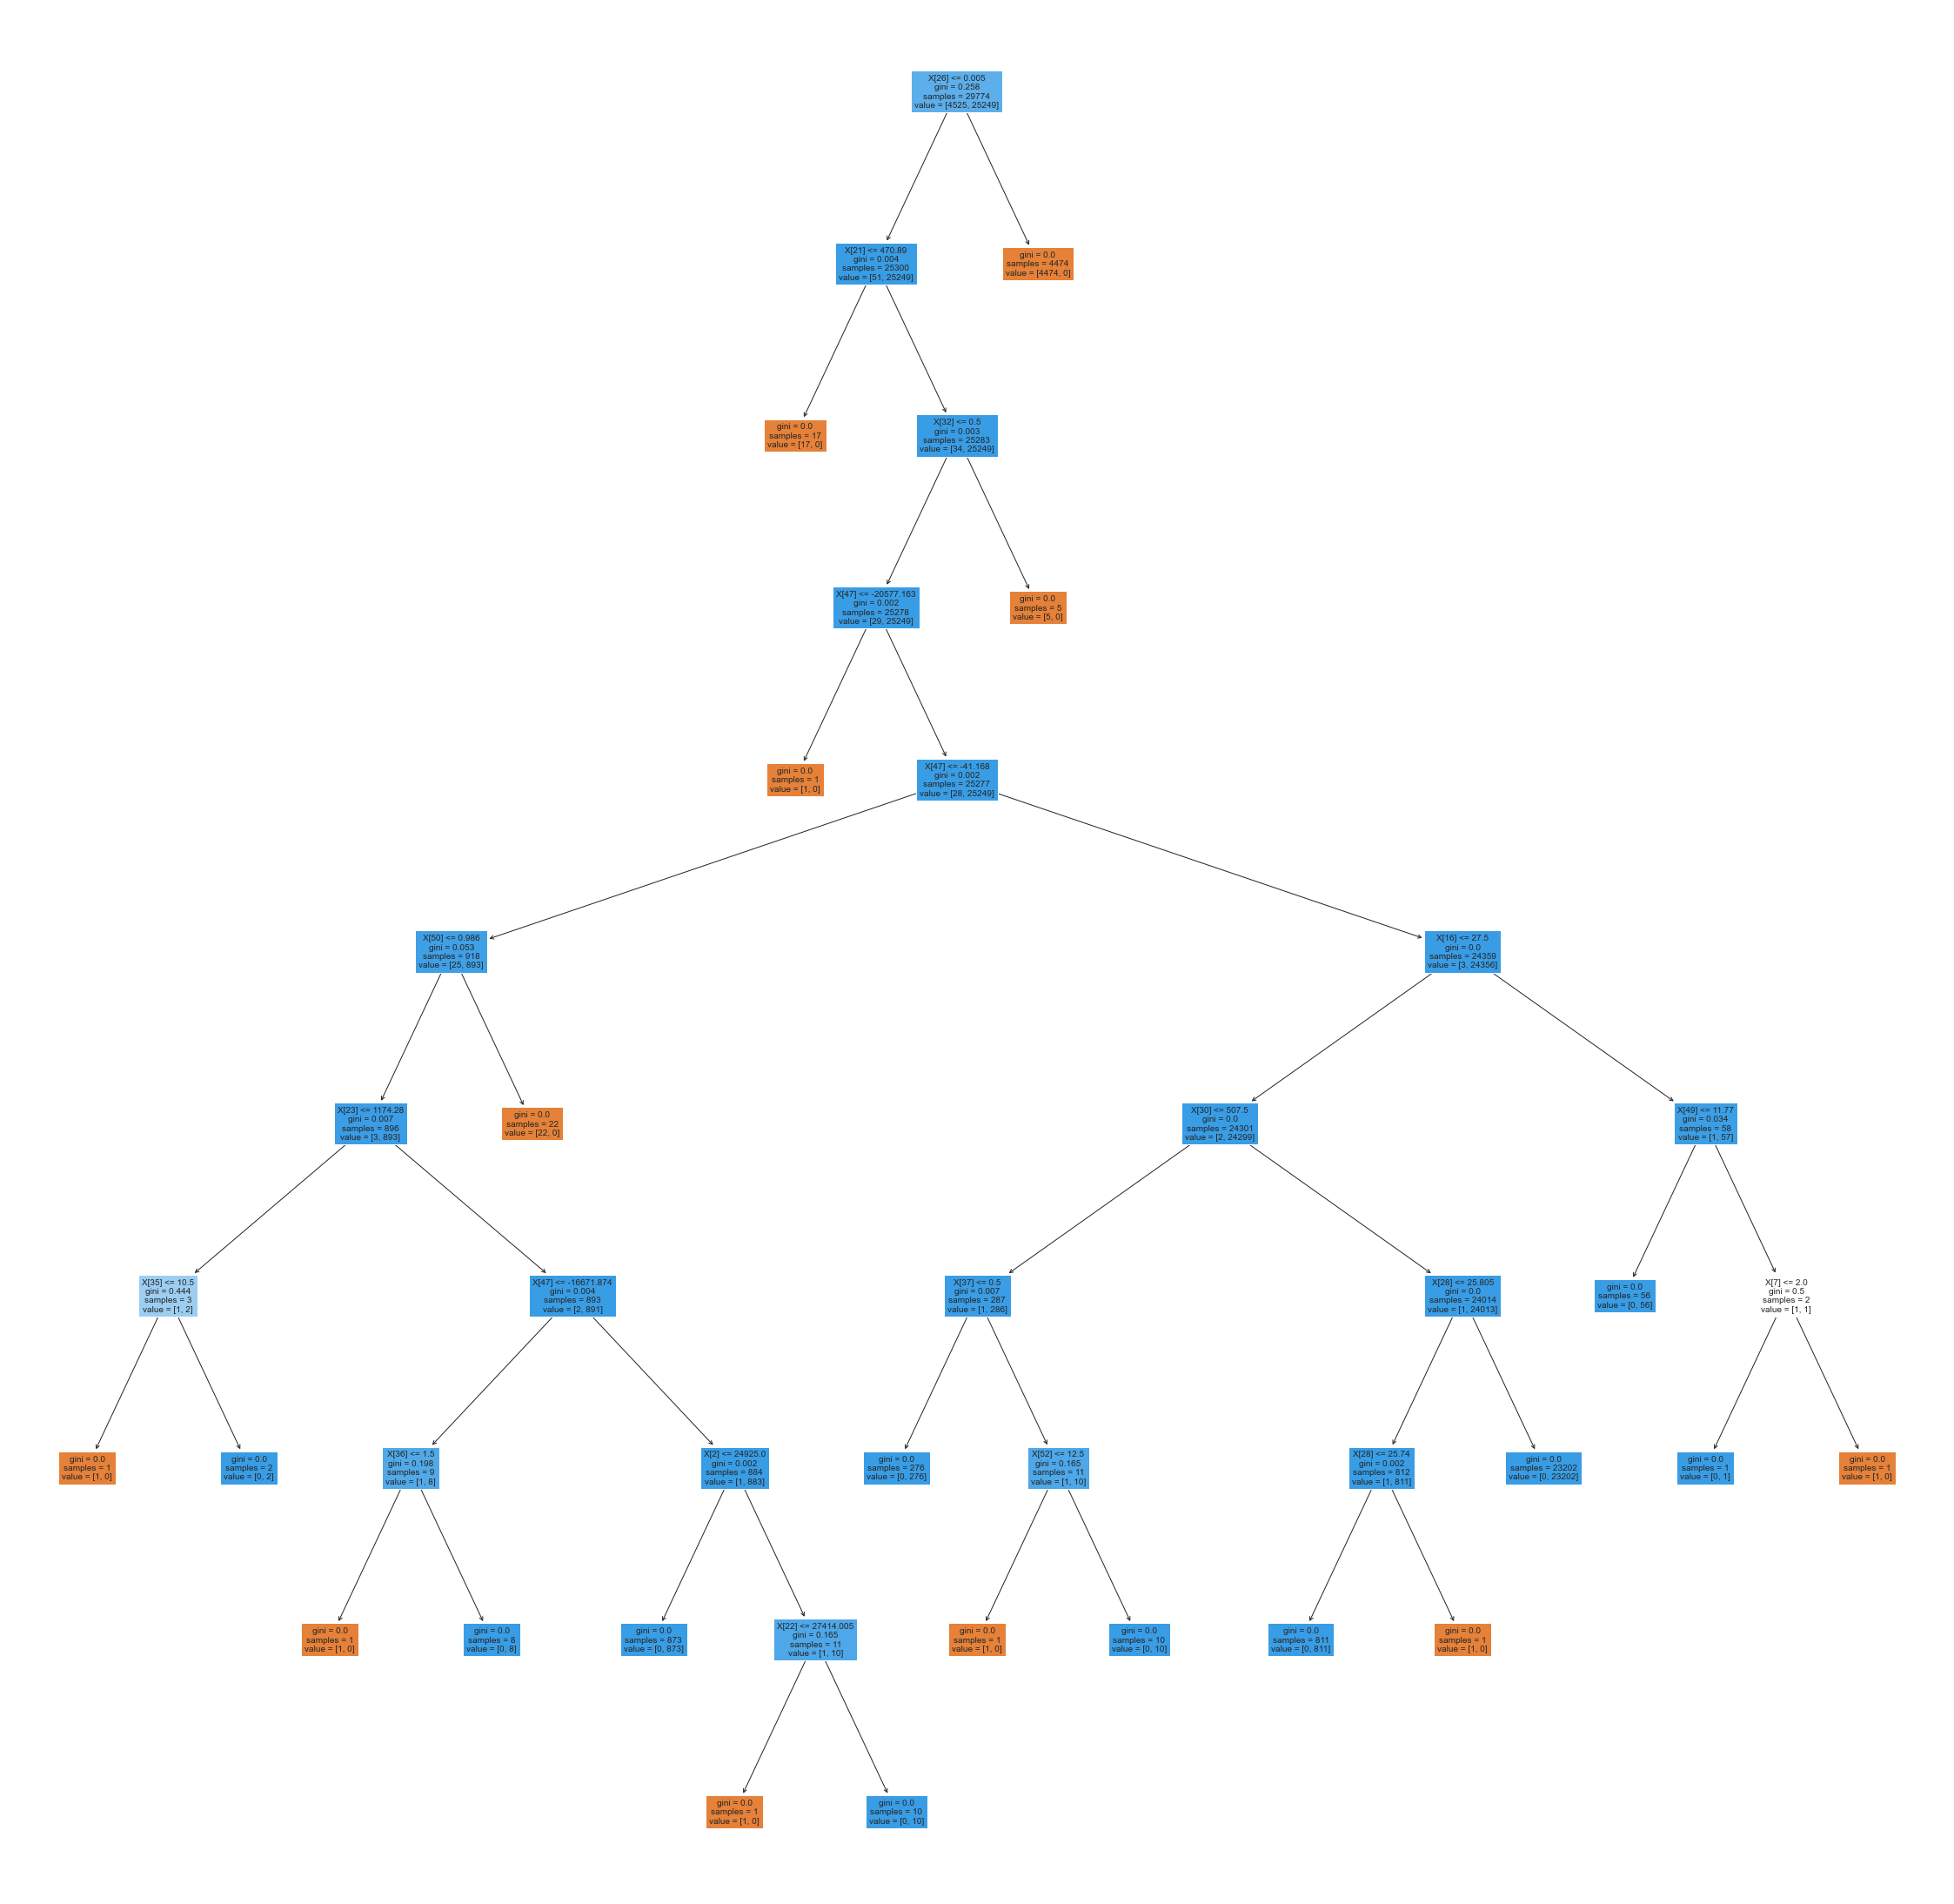

In [78]:
from sklearn import tree

plt.figure(figsize=(40,40))
tree.plot_tree(dtree, fontsize=10, filled=True)
plt.show()

In [79]:
print('Feature importances: \n',pd.DataFrame(dtree.feature_importances_,columns=['Imp'],index=X_train_SMOTE.columns))

Feature importances: 
                                       Imp
loan_amnt                    0.000000e+00
funded_amnt                  0.000000e+00
funded_amnt_inv              2.339611e-05
term                         0.000000e+00
int_rate                     0.000000e+00
installment                  0.000000e+00
emp_length                   0.000000e+00
home_ownership               1.303000e-04
annual_inc                   0.000000e+00
verification_status          0.000000e+00
purpose                      0.000000e+00
dti                          0.000000e+00
delinq_2yrs                  0.000000e+00
fico_range_low               0.000000e+00
fico_range_high              0.000000e+00
inq_last_6mths               0.000000e+00
open_acc                     4.439714e-06
pub_rec                      0.000000e+00
revol_bal                    0.000000e+00
revol_util                   0.000000e+00
total_acc                    0.000000e+00
total_pymnt                  4.415324e-03
total_pymnt

Cechy brane pod uwage podczas wyliczania modelu:

* funded_amnt_inv              0.000029
* dti                          0.000131
* total_pymnt_inv              0.000131
* total_rec_prncp              0.004307
* `recoveries                   0.986639`
* last_pymnt_amnt              0.000263
* debt_settlement_flag         0.002357
* earliest_cr_line_YEARS       0.000263
* issue_d_month                0.000233
* int_amnt                     0.000175
* annual_installment           0.000230
* percent_annual_inc           0.000127
* financial_ratio              0.005103

***
Cechy takie jak: kwota pozyczki, dti, oraz miesieczne odsetki faktycznie moga miec znaczenie podczas splacania pozyczki. Ciekawostą jest, ze model wziął też pod uwagę miesiac w ktorym wzieto pozyczke. Według tego modelu najbardziej istotna była wartość recovery - czyli stopa odzysku kredytu. (dane te były wskazane przez model podczas wczesniejszego wywołania. Niestety dane musiały byc wgrane od poczatku poniewaz program sie samoistnie wyłączył :())
***

In [80]:
#usunięcie wartości nadmiarowych
df_FE3dt=df_FE2.copy()

In [81]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings

X = df_FE3dt.drop(['loan_amnt' ,                 
'funded_amnt',                 
'term',                      
'int_rate' ,                   
'installment',                 
'emp_length' ,                
'home_ownership',              
'annual_inc' ,                 
'verification_status' ,        
'purpose',                    
'delinq_2yrs',                  
'fico_range_low',              
'fico_range_high',            
'inq_last_6mths',              
'open_acc' ,                   
'pub_rec',                      
'revol_bal',                  
'revol_util',                   
'total_acc',                    
'total_pymnt',                  
'total_rec_late_fee',           
'collection_recovery_fee',     
'last_fico_range_high',         
'last_fico_range_low',         
'pub_rec_bankruptcies',        
'earliest_cr_line_month',       
'earliest_cr_line_year',        
'loan_amnt_rating',             
'small_business',               
'credit_card',                  
'debt_consolidation',           
'last_fico_range_high_rating',  
'fico_range_high_rating',       
'issue_d_YEAR',                 
'issue_d_YEARS',                
'fico_range_mean',              
'last_fico_range_mean',         
'leng_expl',                    
'expl', ] , axis=1)
y = df_FE2dt['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

SMOTE = SMOTE()

X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [82]:
dtreen = DecisionTreeClassifier()
dtreen.fit(X_train_SMOTE , y_train_SMOTE)

DecisionTreeClassifier()

In [83]:
y_pred = dtreen.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dtreen.score(X_train_SMOTE,y_train_SMOTE))
# performance on test data
print('Performance on testing data using DT:',dtreen.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 1.0
Performance on testing data using DT: 1.0
Accuracy DT:  1.0
MSE:  0.0


In [84]:
print(classification_report(y_test,y_pred))

dtree_pr= evaluate(y_pred,y_test)
dtree_pr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1886
           1       1.00      1.00      1.00     10875

    accuracy                           1.00     12761
   macro avg       1.00      1.00      1.00     12761
weighted avg       1.00      1.00      1.00     12761



{'f1-score': 1.0, 'accuracy': 1.0}

In [85]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[ 1886     0]
 [    0 10875]]


In [86]:
print('Precision:', cm[0,0]/(cm[0,0]+cm[1,0]))
print('Recall:', cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:', cm[1,1]/(cm[1,1]+cm[1,0]))

Precision: 1.0
Recall: 1.0
Specificity: 1.0


In [87]:
roc_auc=metrics.roc_auc_score(y_test,y_pred)
roc_auc

1.0

[Text(0.5, 0.75, 'X[14] <= 0.5\ngini = 0.5\nsamples = 50458\nvalue = [25229, 25229]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 25229\nvalue = [25229, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 25229\nvalue = [0, 25229]')]

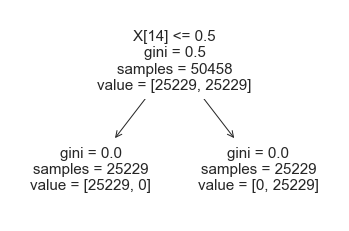

In [88]:
from sklearn import tree

tree.plot_tree(dtreen)

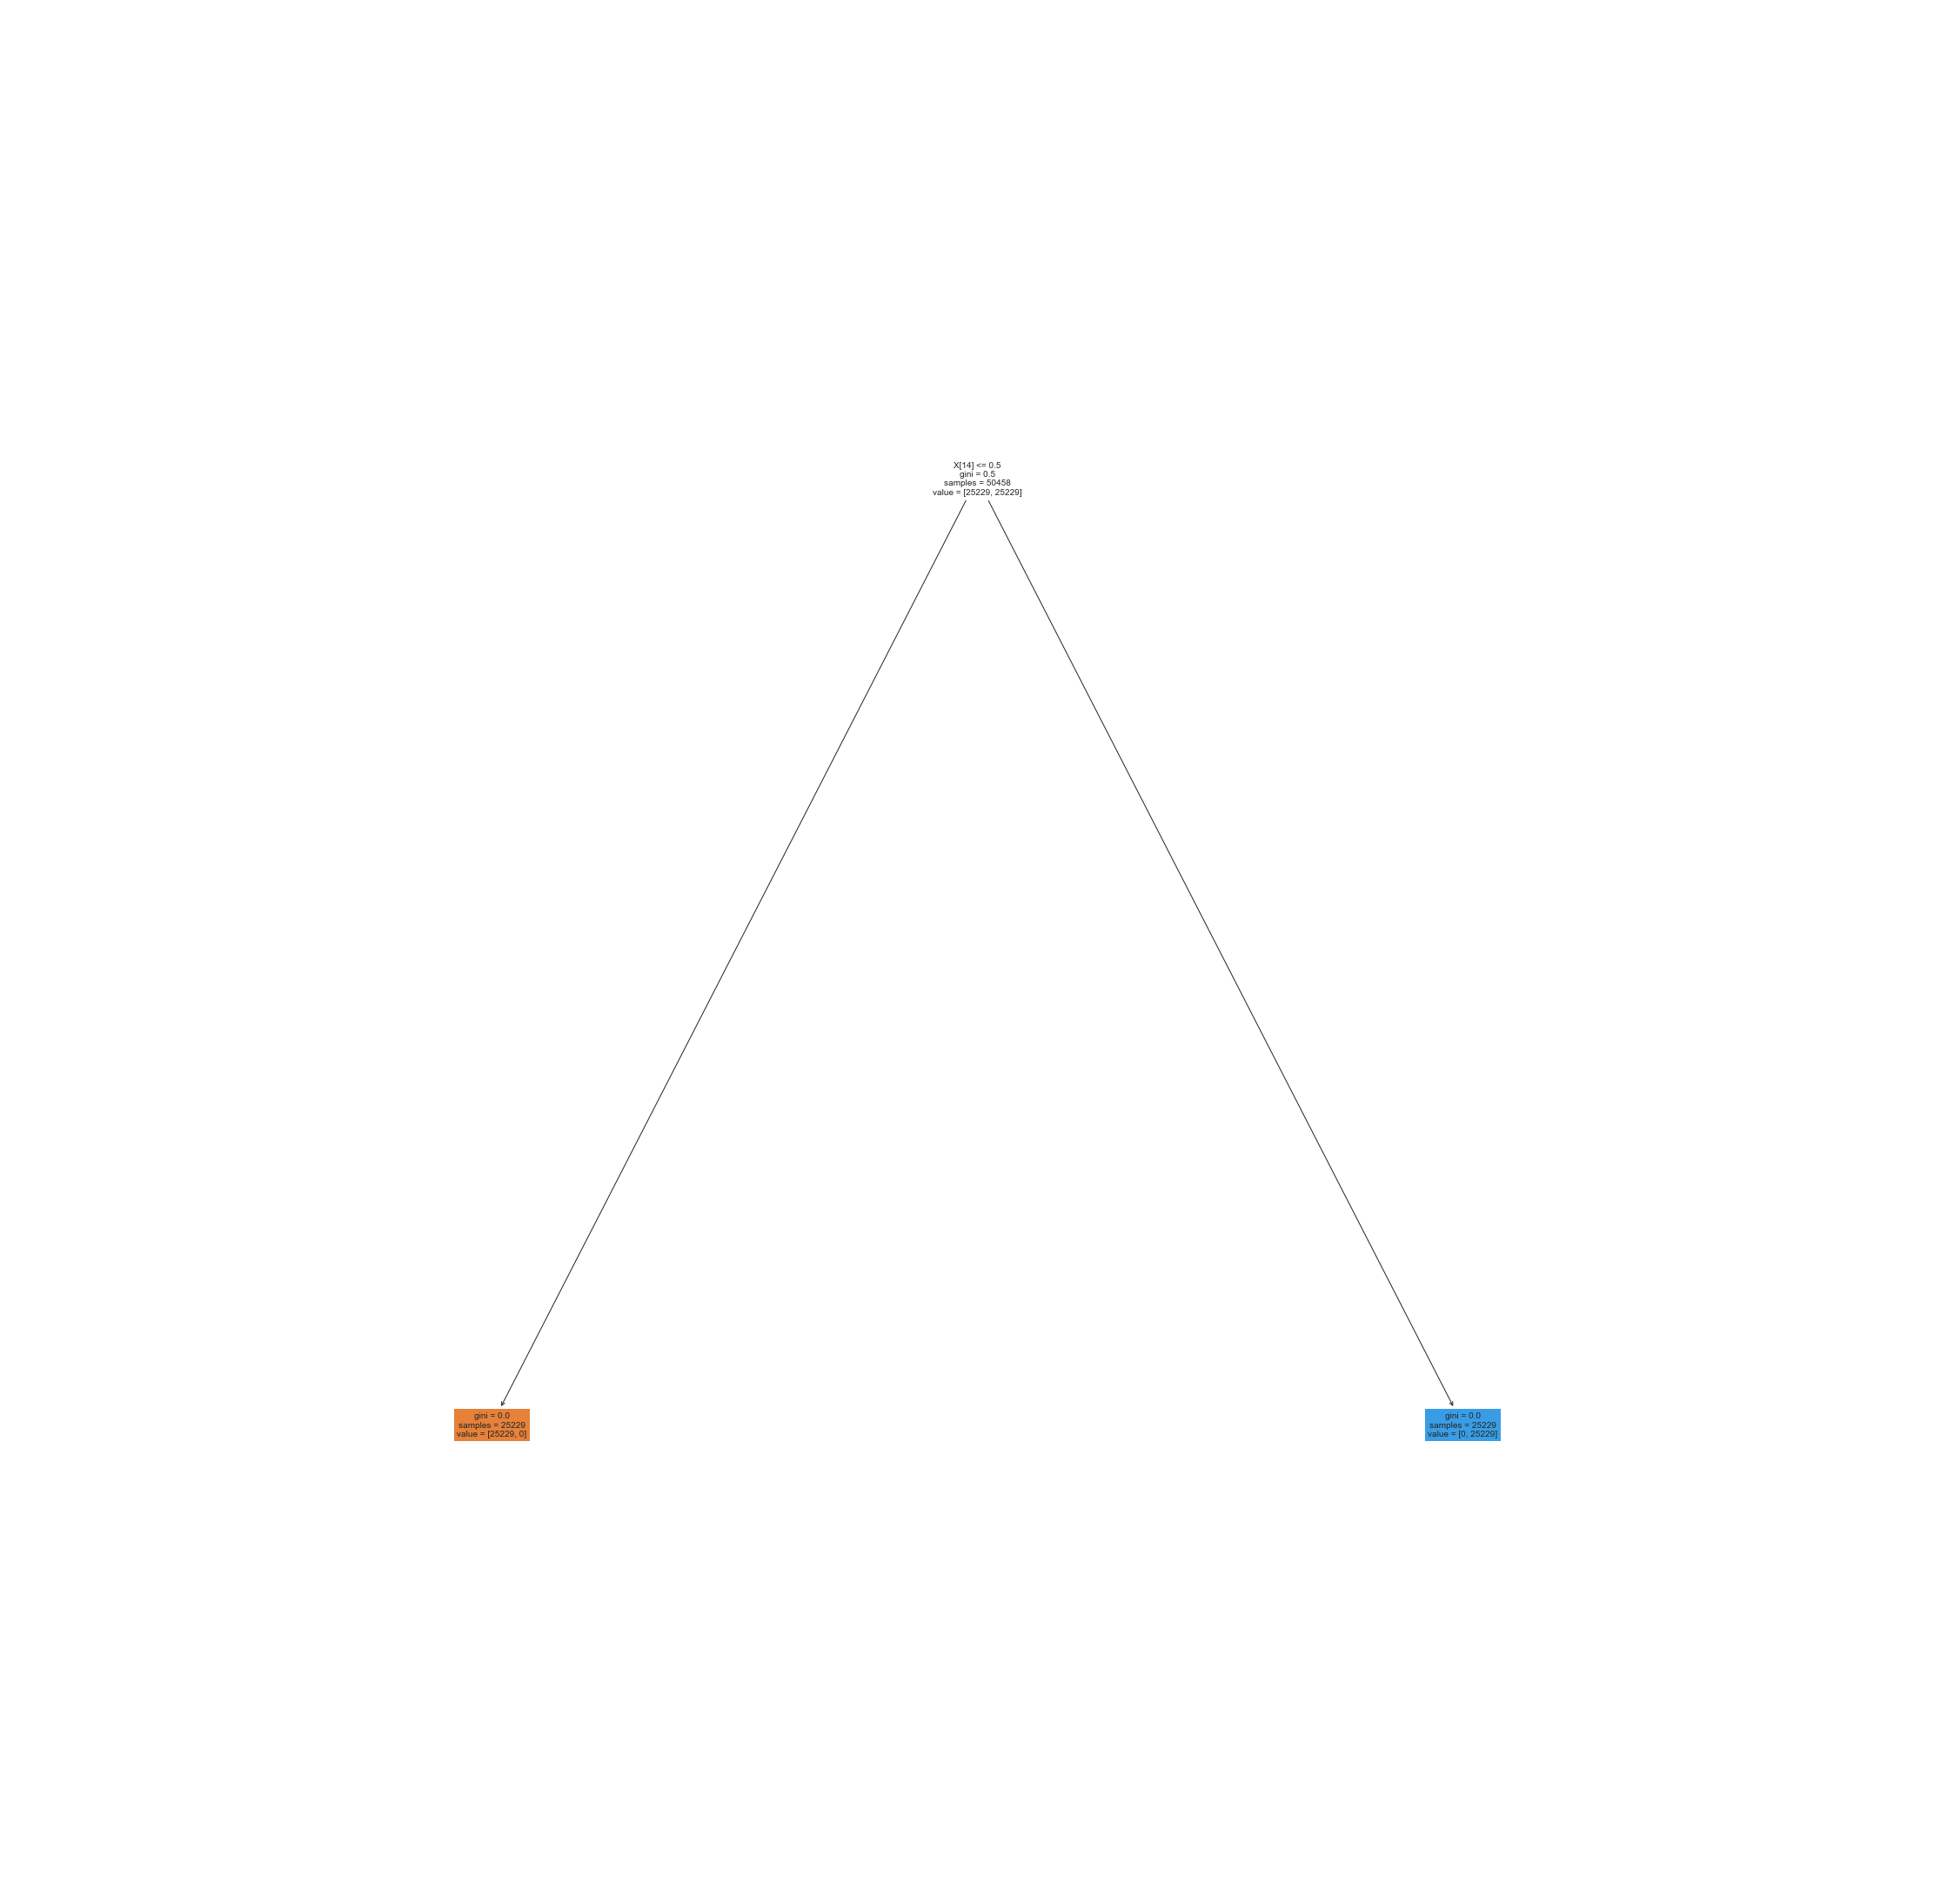

In [89]:
from sklearn import tree

plt.figure(figsize=(40,40))
tree.plot_tree(dtreen, fontsize=10, filled=True)
plt.show()

Zbalansowanie danych spowodowało całkowite przetrenowanie modelu.

####  Balans zbioru razem ze skalowaniem

In [90]:
from imblearn.over_sampling import SMOTE

pca = IncrementalPCA(n_components=28)
pca.fit(X_scaled_df_FE)

X = pd.DataFrame(pca.transform(X_scaled_df_FE))
y = df_FE['loan_status']

#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)


# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

#PART 2
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)


X_train_SMOTE, X_test, y_train_SMOTE, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [91]:
dtree = DecisionTreeClassifier()

In [92]:
dtree.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier()

In [93]:
print('Feature importances: \n',pd.DataFrame(dtree.feature_importances_,columns=['Imp'],index=X_train_SMOTE.columns))

Feature importances: 
          Imp
0   0.041800
1   0.077699
2   0.059961
3   0.288188
4   0.023008
5   0.046834
6   0.016196
7   0.011379
8   0.010622
9   0.011046
10  0.022156
11  0.007261
12  0.015739
13  0.008520
14  0.008296
15  0.015448
16  0.005985
17  0.010756
18  0.008521
19  0.010335
20  0.011813
21  0.013210
22  0.023513
23  0.009900
24  0.121408
25  0.099203
26  0.013190
27  0.008012


In [94]:
y_pred = dtree.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dtree.score(X_train_SMOTE, y_train_SMOTE))
# performance on test data
print('Performance on testing data using DT:',dtree.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 1.0
Performance on testing data using DT: 0.9153671342371288
Accuracy DT:  0.3235950192366306
MSE:  0.08463286576287125


In [95]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('Precision:', cm[0,0]/(cm[0,0]+cm[1,0]))
print('Recall:', cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:', cm[1,1]/(cm[1,1]+cm[1,0]))

[[ 1326   545]
 [  535 10355]]
Precision: 0.7125201504567437
Recall: 0.7087119187600214
Specificity: 0.950872359963269


In [96]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score

In [97]:
print(classification_report(y_test,y_pred))

dtree_pr= evaluate(y_pred,y_test)
dtree_pr

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1871
           1       0.95      0.95      0.95     10890

    accuracy                           0.92     12761
   macro avg       0.83      0.83      0.83     12761
weighted avg       0.92      0.92      0.92     12761



{'f1-score': 0.95, 'accuracy': 0.92}

In [98]:
def evaluate(y_pred,y_test): 
    result = classification_report(y_test,y_pred,output_dict=True)
    f1 = result['1']['f1-score']

    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [99]:
metrics.roc_auc_score(y_pred,y_test)

0.8312600752283719

***
Model po wytrenowaniu na zeskalowanych i zbalansowanych danych ma niższą wartość aucroc.
***

#### Walidacja krzyżowa

In [100]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from imblearn.over_sampling import SMOTE

pca = IncrementalPCA(n_components=23)
pca.fit(X_scaled_df_FE)

X = pd.DataFrame(pca.transform(X_scaled_df_FE))
y = df_FE['loan_status']

#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)


# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

#PART 2
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)


In [129]:
X_train_SMOTE, X_test, y_train_SMOTE, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


clf = svm.SVC(kernel='linear', C=1).fit(X_train_SMOTE, y_train_SMOTE)
clf.score(X_test, y_test)

0.9912425061713883

In [116]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.98953803, 0.98730457, 0.98589397, 0.98130951, 0.96109087])

In [105]:
from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.99097266, 0.98884227, 0.98300316, 0.98198911, 0.97045936])

In [106]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :param train_sizes:
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

In [ ]:
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [107]:
ns_probs = [0 for _ in range(len(y_test))]

No Skill: ROC AUC=0.500
neural_network: ROC AUC=0.950


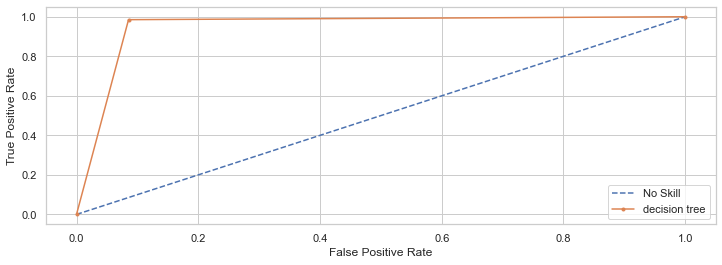

In [112]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
dt_probs = dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('neural_network: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
# plot the roc curve for the model
plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='decision tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Bias–variance trade off

In [120]:
!pip install mlxtend

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp

In [135]:
from imblearn.over_sampling import SMOTE

pca = IncrementalPCA(n_components=28)
pca.fit(X_scaled_df_FE)

X = pd.DataFrame(pca.transform(X_scaled_df_FE))
y = df_FE['loan_status']

#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)


# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

#PART 2
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)


X_train_SMOTE, X_test, y_train_SMOTE, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


# define the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_SMOTE , y_train_SMOTE)
# estimate bias and variance
mse, bias, var = bias_variance_decomp(dtree, X_train_SMOTE, y_train_SMOTE, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

ValueError: The bias_variance_decomp does not support pandas DataFrames yet. Please check the inputs to X_train, y_train, X_test, y_test. If e.g., X_train is a pandas DataFrame, try passing it as NumPy array via X_train=X_train.values.

In [131]:
# RMSE for ridge regression model with alpha = 0.1
ridgeModel = Ridge(alpha = 0.1)
rmse = rmse_cv(ridgeModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

NameError: name 'rmse_cv' is not defined

`Wytrenowany model ma wartosc AUCROC rowna 0.95 co wskazuje na wysokie dopasowanie. `